In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.stats as ss
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle, Patch
from matplotlib.collections import PatchCollection
import re
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from collections import Counter

In [2]:
id_var_long_dict = {'2020_0_0': "Do you often feel lonely?",
               '2010_0_0': "Do you suffer from 'nerves'?",
               '2030_0_0': "Are you often troubled by feelings of guilt?",
               '1990_0_0': "Would you call yourself tense or 'highly strung'?",
               '1950_0_0': "Are your feelings easily hurt?",
               '1930_0_0': "Do you ever feel 'just miserable' for no reason?",
               '1970_0_0': "Would you call yourself a nervous person?",
               '2000_0_0': "Do you worry too long after an embarrassing experience?",
               '1940_0_0': "Are you an irritable person?",
               '1960_0_0': "Do you often feel 'fed-up'?",
               '1920_0_0': "Does your mood often go up and down?",
               '1980_0_0': "Are you a worrier?",
        '20127_0_0_quant': "Summary score of neuroticism.",
                '399_0_1': "Pair matching. Basic game.",
               '4294_0_0': "Prospective memory. Final attempt correct.",
               '4979_0_0': "Fluid intelligence. Family relationship calculation.",
               '5001_0_0': "Fluid intelligence. Synonym.",
          '399_0_2_quant': "Pair matching. Full game.",
               '4968_0_0': "Fluid intelligence. Positional arithmetic.",
          '400_0_1_quant': "Pair matching. Time to complete basic game.",
               '4957_0_0': "Fluid intelligence. Word interpolation.",
          '400_0_2_quant': "Pair matching. Time to complete full game.",
         '6348_2_0_quant': "Trail making. Duration to complete numeric path.",
               '4990_0_0': "Fluid intelligence. Conditional arithmetic.",
        '20023_0_0_quant': "Reaction time. Mean time to correctly identify matches.",
               '5012_0_0': "Fluid intelligence. Chained arithmetic.",
        '23324_2_0_quant': "Symbol digit substitution. Number of matches made correctly.",
        '21004_2_0_quant': "Tower rearranging. Number of puzzles solved.",
         '4282_0_0_quant': "Numeric memmory. Maximum digits remembered correctly.",
               '5556_0_0': "Fluid intelligence. Concept interpolation.",
         '6350_2_0_quant': "Trail making. Duration to complete alphanumeric path.",
               '5790_0_0': "Fluid intelligence. Square sequence recognition.",
         '6373_2_0_quant': "Matrix pattern completion. Number of puzzles solved.",
               '5699_0_0': "Fluid intelligence. Arithmetic sequence recognition.",
        '20016_0_0_quant': "Fluid intelligence score."}

id_var_dict = {'2020_0_0':"Lonely",
                     '2010_0_0':"Nerves",
                     '2030_0_0':"Guilt",
                     '1990_0_0':"Tense",
                     '1950_0_0':"Feelings hurt",
                     '1930_0_0':"Miserable",
                     '1970_0_0':"Nervous",
                     '2000_0_0':"Worry embarrass",
                     '1940_0_0':"Irritable",
                     '1960_0_0':"Fed-up",
                     '1920_0_0':"Mood swings",
                     '1980_0_0':"Worrier",
              '20127_0_0_quant':"Neuroticism score",
                      '399_0_1':"Pair matching 3",
                     '4294_0_0':"Prosp. memory",
                     '4979_0_0':"Family relation calc (FI)",
                     '5001_0_0':"Synonym (FI)",
                '399_0_2_quant':"Pair matching 1",
                     '4968_0_0':"Positional math (FI)",
                '400_0_1_quant':"Pair matching 4",
                     '4957_0_0':"Word interploation (FI)",
                '400_0_2_quant':"Pair matching 2",
               '6348_2_0_quant':"Trail making 2",
                     '4990_0_0':"Conditional math (FI)",
              '20023_0_0_quant':"Reaction time",
                     '5012_0_0':"Chained math (FI)",
              '23324_2_0_quant':"Symbol digit substitution",
              '21004_2_0_quant':"Tower rearranging",
               '4282_0_0_quant':"Numeric memory",
                     '5556_0_0':"Concept interpolation (FI)",
               '6350_2_0_quant':"Trail making 1",
                     '5790_0_0':"Seq. recognition 1 (FI)",
               '6373_2_0_quant':"Matrix patern",
                     '5699_0_0':"Seq. recognition 2 (FI)",
              '20016_0_0_quant':"Fluid intelligence score"}

var_id_dict = {v:k for k,v in id_var_dict.items()}
trait_order = ['1940_0_0', '2020_0_0', '20127_0_0_quant', '1930_0_0', '1960_0_0', '1920_0_0', '1990_0_0', '1980_0_0', '2010_0_0', '1970_0_0', '1950_0_0', '2030_0_0', '2000_0_0', '20023_0_0_quant', '6350_2_0_quant', '6348_2_0_quant', '23324_2_0_quant', '399_0_2_quant', '400_0_2_quant', '21004_2_0_quant', '399_0_1', '400_0_1_quant', '4282_0_0_quant', '4294_0_0', '4979_0_0', '6373_2_0_quant', '5790_0_0', '5699_0_0', '4968_0_0', '5556_0_0', '4990_0_0', '5012_0_0', '5001_0_0', '4957_0_0', '20016_0_0_quant'] # list(id_var_dict)
neur_traits = "2020_0_0 2010_0_0 2030_0_0 1990_0_0 1950_0_0 1930_0_0 1970_0_0 2000_0_0 1940_0_0 1960_0_0 1920_0_0 1980_0_0 20127_0_0_quant".split()
swap_sign = '399_0_1 4294_0_0 4979_0_0 5001_0_0 399_0_2_quant 4968_0_0 400_0_1_quant 4957_0_0 400_0_2_quant 4990_0_0 20023_0_0_quant 5012_0_0 5556_0_0 5790_0_0 5699_0_0 6348_2_0_quant 6350_2_0_quant'.split()

In [3]:
# h2, number of loci and sample size
def parse_h2_log(fname):
    lines = open(fname).readlines()
    h2_line = [l for l in lines if l.startswith("Total Observed scale h2:")][0]
    h2, se = map(float, h2_line.split(':')[1].replace('(','').replace(')','').split())
    h2 = max(h2, 0)
    pval = ss.norm.cdf(0, loc=h2, scale=se) # one sieded p-value
    return h2, se, pval

trait_list, h2_list, h2_se_list, h2_p_list, n_loci_list, n_samples_list = [], [], [], [], [], []
for group in ("touchscreen", "cognition"):
    print(f"Processiong {group}")
    h2_dir = f"/cluster/projects/p33/users/alexeas/most_mental/new_start/ldsr/h2/{group}"
    clump_dir = f"/cluster/projects/p33/users/alexeas/most_mental/new_start/gwas_merged/{group}/clump"
    gwas_n_file = f"/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/gwas_n.{group}.csv"
    outf = f"/cluster/projects/p33/users/alexeas/most_mental/new_start/gwas_merged/{group}/figures/custom/h2_loci_n.{group}.png"

    # exclude quant versions of two personality variabes
    group_trait_list = []
    for de in os.scandir(h2_dir):
        if de.name.endswith("h2.log"): # and not "4609_0_0_quant" in de.name and not "5375_0_0_quant" in de.name
            h2, se, p = parse_h2_log(de.path)
            if h2 < 0:
                h2 = 0
            trait = de.name.split('.')[0]
            h2_list.append(h2)
            h2_se_list.append(se)
            h2_p_list.append(p)
            trait_list.append(trait)
            group_trait_list.append(trait)

    # get N loci for traits in traits_arr with keeping the order
    for t in group_trait_list:
        loci_fname = os.path.join(clump_dir,f"orig.{t}.loci.csv")
        if os.path.isfile(loci_fname):
            with open(loci_fname) as loci_file:
                n_loci_list.append(len(loci_file.readlines())-1)
        else:
            n_loci_list.append(0)

    print(f"{len(trait_list)} traits collected")

    df_n = pd.read_table(gwas_n_file)
    del df_n["ID"]
    n_samples_list += list(df_n[group_trait_list].max(axis=0))

trait_df = pd.DataFrame({"trait":trait_list, "h2":h2_list, "h2_se":h2_se_list, "h2_p":h2_p_list,
                         "n_loci":n_loci_list, "n_samples":n_samples_list})
trait_df.head()

Processiong touchscreen
51 traits collected
Processiong cognition
81 traits collected


,trait,h2,h2_se,h2_p,n_loci,n_samples
0,2020_0_0,0.0377,0.0022,3.973386e-66,6,332193
1,4598_0_0,0.0623,0.0053,3.339207e-32,3,109209
2,6156_val5,0.0043,0.0015,2.074098e-03,1,337125
3,6156_val1,0.0033,0.0014,9.208080e-03,1,337125
4,6145_val5,0.0320,0.0020,6.388754e-58,4,337125


In [4]:
used_traits_df = trait_df.loc[trait_df.trait.isin(id_var_dict),:]
used_traits_df.n_samples.describe()

count        35.000000
mean     214974.314286
std      122535.026638
min       11679.000000
25%      107025.000000
50%      274056.000000
75%      329029.000000
max      336993.000000
Name: n_samples, dtype: float64

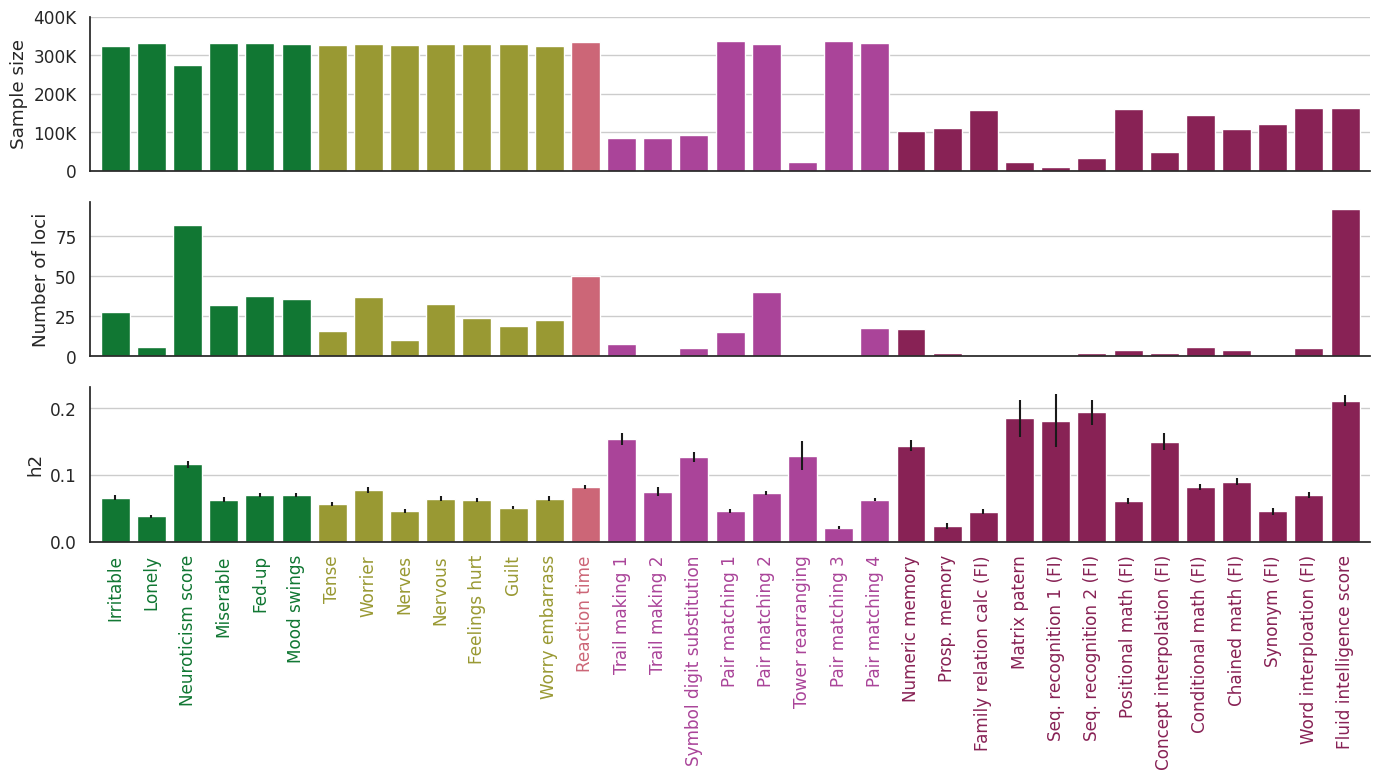

In [7]:
# plot h2, number of loci and sample size
matplotlib.rc_file_defaults()
#sns.color_palette("tab10")
sns.set(font_scale=1.1)
sns.set_style(style='white')

outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/h2_nloci_nsamples.220201"
formats = ['png', 'svg']
savefig = True

used_trait_df = trait_df.copy()
used_trait_df.index = used_trait_df.trait
used_trait_df = used_trait_df.loc[trait_order,:]

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence
clusters = [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5]

cluster_1_color = "#117733" # "#4477AA"
cluster_2_color = "#999933" # "#66CCEE"
cluster_3_color = "#CC6677" # "#228833"
cluster_4_color = "#AA4499" # "#CCBB44"
cluster_5_color = "#882255" # "#EE6677"
cluster_colors = [cluster_1_color, cluster_2_color, cluster_3_color, cluster_4_color, cluster_5_color]

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,8), sharex=True)
x_pos_all = np.arange(len(trait_order))

#ax1.set_title(f"Univariate GWAS of {len(trait_order)} {group} traits")
for i, cl in enumerate(clusters):
    i_start = sum(map(len, clusters[:i]))
    i_end = i_start + len(cl)
    x_pos = x_pos_all[i_start:i_end]
    
    ax1.bar(x_pos, used_trait_df.n_samples[cl], align='center', color=cluster_colors[i], edgecolor=None)
    ax2.bar(x_pos, used_trait_df.n_loci[cl], align='center', color=cluster_colors[i], edgecolor=None)

    ax3.bar(x_pos, used_trait_df.h2[cl], yerr=used_trait_df.h2_se[cl], align='center', color=cluster_colors[i],
           edgecolor=None)

ax1.set_xticks(x_pos_all)
y_ticks = ax1.get_yticks()
y_tick_labels = [f"{int(y//1000)}K" if y > 1000 else str(int(y)) for y in y_ticks]
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_tick_labels)
ax1.set_ylabel('Sample size')
ax1.grid(axis='y')

ax2.set_xticks(x_pos_all)
ax2.set_ylabel('Number of loci')
ax2.grid(axis='y')

ax3.set_xticks(x_pos_all)
x_tick_labels = [id_var_dict[t] for t in used_trait_df.trait]
ax3.set_xticklabels(x_tick_labels, rotation=90)
#a3.invert_xaxis()  # labels read top-to-bottom
ax3.grid(axis='y')
ax3.set_ylabel('h2')
ax3.set_xlim((x_pos_all[0]-0.7,x_pos_all[-1]+0.7))


for trait, tlx in zip(trait_order, ax3.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tlx.set_color(cluster_1_color)
    elif trait in cluster_2:
        tlx.set_color(cluster_2_color)
    elif trait in cluster_3:
        tlx.set_color(cluster_3_color)
    elif trait in cluster_4:
        tlx.set_color(cluster_4_color)
    else:
        tlx.set_color(cluster_5_color)
for ax in (ax1,ax2,ax3):
    #ax.tick_params(axis='both', labelsize=11)
    #ax.tick_params(axis='x', rotation=90)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

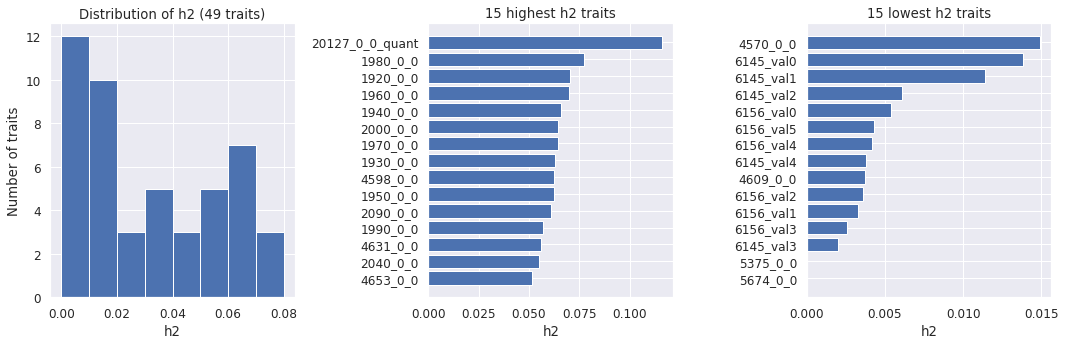

In [35]:
# plot h2 and top/bottom traits
top_n_to_plot = 15
bottom_n_to_plot = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.hist(h2_arr, bins=np.linspace(0,0.08,9))
ax1.set_xlabel('h2')
ax1.set_ylabel('Number of traits')
ax1.set_title(f'Distribution of h2 ({len(traits_arr)} traits)')

y_pos = np.arange(top_n_to_plot)
ax2.barh(y_pos, h2_arr[-top_n_to_plot:], align='center')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(traits_arr[-top_n_to_plot:])
#ax.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('h2')
ax2.set_title(f'{top_n_to_plot} highest h2 traits')

ax3.barh(y_pos, h2_arr[:bottom_n_to_plot], align='center')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(traits_arr[:bottom_n_to_plot])
#a3.invert_yaxis()  # labels read top-to-bottom
ax3.set_xlabel('h2')
ax3.set_title(f'{bottom_n_to_plot} lowest h2 traits')

plt.tight_layout()
#plt.savefig(outf)

32 significant h2


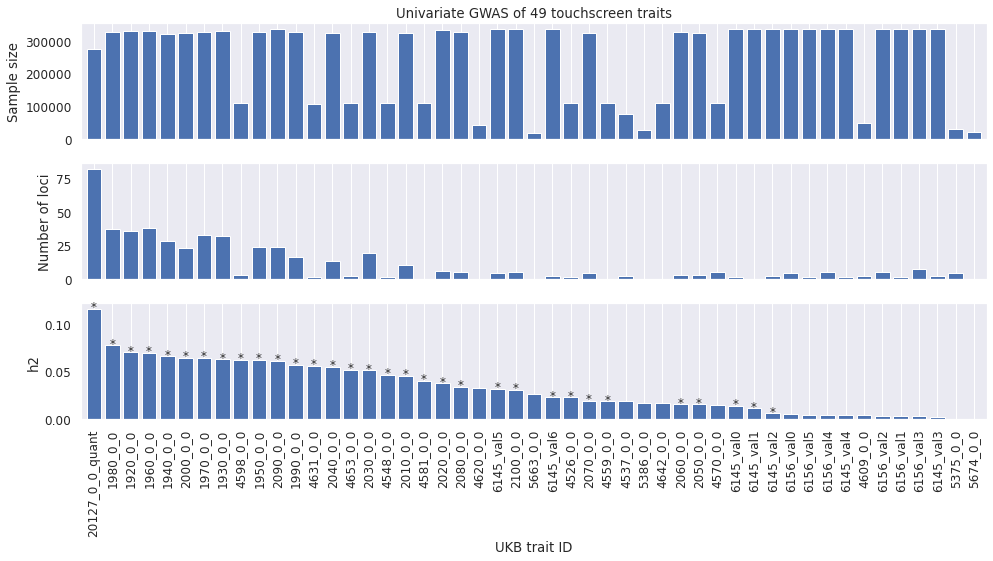

In [36]:
# plot h2, number of loci and sample size
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,8), sharex=True)
x_pos = np.arange(len(traits_arr))

ax1.set_title(f"Univariate GWAS of {len(traits_arr)} {group} traits")

ax1.bar(x_pos, n_arr[::-1], align='center')
ax1.set_xticks(x_pos)
#ax1.set_xticklabels(traits_arr)
ax1.set_ylabel('Sample size')
ax1.grid(axis='y')

ax2.bar(x_pos, loci_arr[::-1], align='center')
ax2.set_xticks(x_pos)
#ax2.set_xticklabels(traits_arr)
ax2.set_ylabel('Number of loci')
ax2.grid(axis='y')

bar_container = ax3.bar(x_pos, h2_arr[::-1], align='center')
p_thresh = ss.norm.cdf(-4) # as recommended in Bulik-Sullivan et al. 2015, see https://nealelab.github.io/UKBB_ldsc/significance.html
for i,bar in enumerate(bar_container.patches):
    if h2_p_arr[::-1][i] < p_thresh:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
        ax3.annotate('*', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 2), textcoords='offset points')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(traits_arr[::-1], rotation=90)
#a3.invert_xaxis()  # labels read top-to-bottom
ax3.grid(axis='y')
ax3.set_ylabel('h2')
ax3.set_xlabel('UKB trait ID')
ax3.set_xlim((x_pos[0]-0.7,x_pos[-1]+0.7))

plt.tight_layout()
#plt.savefig(outf)
print(f'{sum(h2_p_arr<p_thresh)} significant h2')

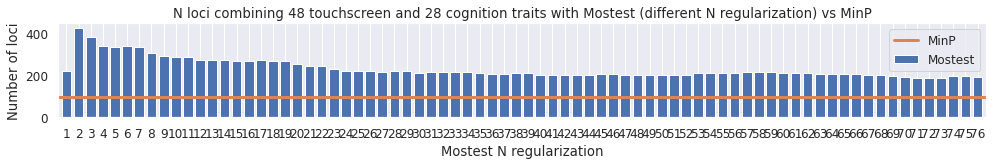

In [37]:
# mostest number of loci with different N eigenval to keep vs minp N loci
clump_dir = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality48_cognition28/clump"
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality48_cognition28/figures/custom/mostest_n_reg.png"
neig_dict = {int(de.name.split('.')[0].replace('personality48_cognition28_eig','')):len(open(de.path).readlines())-1
             for de in os.scandir(clump_dir) if de.name.endswith(".most.orig.loci.csv")}
neig_arr = np.array([neig_dict[i] for i in sorted(neig_dict)])

n_minp = len(open(os.path.join(clump_dir,f"personality48_cognition28_eig1.minp.orig.loci.csv")).readlines())-1

fig, ax = plt.subplots(1,1,figsize=(14,2.5))
x_pos = np.arange(1,len(neig_arr)+1)

ax.set_title(f"N loci combining 48 touchscreen and 28 cognition traits with Mostest (different N regularization) vs MinP")

ax.bar(x_pos, neig_arr, align='center', label="Mostest")
ax.axhline(n_minp, color='C1', lw=3, label="MinP")
ax.set_xticks(x_pos)
ax.set_xticklabels(map(str,sorted(neig_dict)))
ax.grid(axis='y')
ax.set_ylabel('Number of loci')
ax.set_xlabel('Mostest N regularization')
ax.set_xlim((x_pos[0]-0.7,x_pos[-1]+0.7))
plt.legend()
plt.tight_layout()
#plt.savefig(outf)

In [ ]:
neig_arr.max()

In [ ]:
n_minp

In [ ]:
# rg
rg_dir = "/cluster/projects/p33/users/alexeas/most_mental/new_start/ldsr/rg"
h2_dir_touchscreen = "/cluster/projects/p33/users/alexeas/most_mental/new_start/ldsr/h2/touchscreen"
h2_dir_cognition = "/cluster/projects/p33/users/alexeas/most_mental/new_start/ldsr/h2/cognition"

def parse_rg(rg_dir):
    # { frozenset([trait1,trait2]) : (rg, pval) }
    rg_dict = {}
    for de in os.scandir(rg_dir):
        trait1, trait2 = de.name.split('.')[0].split('_vs_')
        with open(de.path) as f:
            for l in f:
                if l.startswith("Genetic Correlation:"):
                    if 'nan' in l:
                        rg, pval = 0.0, 1.0
                    else:
                        rg, se = map(float, l.split(':')[1].replace('(','').replace(')','').split())
                        pval = ss.norm.cdf(0, loc=abs(rg), scale=se) # one sieded p-value
                    rg_dict[frozenset((trait1,trait2))] = (rg, pval)
                    break
    return rg_dict


def parse_h2(h2_dir):
    h2_dict = {}
    for de in os.scandir(h2_dir):
        trait = de.name.split('.')[0]
        with open(de.path) as f:
            for l in f:
                if l.startswith("Total Observed scale h2:"):
                    h2, se = map(float, l.split(':')[1].replace('(','').replace(')','').split())
                    h2 = max(h2, 0)
                    pval = ss.norm.cdf(0, loc=h2, scale=se) # one sieded p-value
                    h2_dict[trait] = (h2, pval)
    return h2_dict


rg_dict = parse_rg(rg_dir)
h2_dict_touchscreen = parse_h2(h2_dir_touchscreen)
h2_dict_cognition = parse_h2(h2_dir_cognition)

In [ ]:
personality13_cognition22_traits = "20127_0_0_quant 1920_0_0 1930_0_0 1940_0_0 1950_0_0 1960_0_0 1970_0_0 1980_0_0 1990_0_0 2000_0_0 2010_0_0 2020_0_0 2030_0_0 399_0_1 4294_0_0 4979_0_0 5001_0_0 399_0_2_quant 4968_0_0 400_0_1_quant 4957_0_0 400_0_2_quant 6348_2_0_quant 4990_0_0 20023_0_0_quant 5012_0_0 23324_2_0_quant 21004_2_0_quant 4282_0_0_quant 5556_0_0 6350_2_0_quant 5790_0_0 6373_2_0_quant 5699_0_0 20016_0_0_quant".split()
swap_sign = '399_0_1 4294_0_0 4979_0_0 5001_0_0 399_0_2_quant 4968_0_0 400_0_1_quant 4957_0_0 400_0_2_quant 6348_2_0_quant 4990_0_0 20023_0_0_quant 5012_0_0 5556_0_0 6350_2_0_quant 5790_0_0 5699_0_0'.split()
print(f"{len(swap_sign)} varibles with swapped sign")
N = len(h2_dict_touchscreen) + len(h2_dict_cognition)
mat2plot = np.zeros((N,N))
trait_labels = []
p_thresh = ss.norm.cdf(-4) # as recommended in Bulik-Sullivan et al. 2015, see https://nealelab.github.io/UKBB_ldsc/significance.html
#traits = [ for t,h2_p in]
sort_func = lambda x: x[1][0]
trait_h2_list = sorted(h2_dict_touchscreen.items(), key=sort_func) + sorted(h2_dict_cognition.items(), key=sort_func)
i_significant_h2 = []
for i, (t, (h2, h2_p)) in enumerate(trait_h2_list):
    trait_labels.append(t)
    if h2_p<p_thresh and not 'nomerge' in t and t in personality13_cognition22_traits:
        i_significant_h2.append(i)
        mat2plot[i,i] = 1 # h2
        for j, (t_j, (h2_j, h2_p_j)) in enumerate(trait_h2_list[i+1:]):
            if h2_p_j<p_thresh:
                rg, rg_p = rg_dict[frozenset([t,t_j])]
                if rg_p < 0.05:
                    sign_t = -1 if t in swap_sign else 1
                    sign_t_j = -1 if t_j in swap_sign else 1
                    sign = sign_t*sign_t_j
                    mat2plot[i,i+1+j] = sign*rg
                    mat2plot[i+1+j,i] = sign*rg

In [ ]:
corrmat = mat2plot[i_significant_h2,:][:,i_significant_h2]
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/rg_map_var_names.png"
fig, ax = plt.subplots(1,1,figsize=(20,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True, linewidths=.5, center=0, cmap='bwr', cbar_kws={"shrink": .3}, ax=ax)
ax.set_yticks(np.arange(corrmat.shape[0]) + 0.5)
significant_traits = [trait_labels[i] for i in i_significant_h2]
# variable_discr_dict is defined below
_ = ax.set_yticklabels([variable_discr_dict[t] for t in significant_traits], fontsize=12, rotation=0)
ax.set_xticks(np.arange(corrmat.shape[0]) + 0.5)
_ = ax.set_xticklabels(significant_traits, fontsize=12, rotation=90)

color_touchscreen = 'C9'
color_cognition = 'C5'
for tlx, tly, trait in zip(ax.get_xticklabels(), ax.get_yticklabels(), significant_traits):
    if trait in h2_dict_touchscreen:
        tlx.set_color(color_touchscreen)
        tly.set_color(color_touchscreen)
    else:
        tlx.set_color(color_cognition)
        tly.set_color(color_cognition)

#ax.scatter([0.5,1.5],[0.5,2.5])
#ax.invert_yaxis()
plt.tight_layout()
plt.savefig(outf, facecolor='w')

In [ ]:
mat2plot[i_significant_h2,:][:,i_significant_h2]

In [ ]:
len(i_significant_h2)

In [ ]:
i_sig = h2_p_arr<p_thresh
' '.join(traits_arr[i_sig])

In [ ]:
i_sig = h2_p_arr<p_thresh
' '.join(traits_arr[i_sig])

In [ ]:
i_sig.sum()

In [ ]:
# merge and extract traits
# traits to extract
touchscreen32_traits = '6145_val2 6145_val1 6145_val0 2050_0_0 2060_0_0 4559_0_0 2070_0_0 4526_0_0 6145_val6 2100_0_0 6145_val5 2080_0_0 2020_0_0 4581_0_0 2010_0_0 4548_0_0 2030_0_0 4653_0_0 2040_0_0 4631_0_0 1990_0_0 2090_0_0 1950_0_0 4598_0_0 1930_0_0 1970_0_0 2000_0_0 1940_0_0 1960_0_0 1920_0_0 1980_0_0 20127_0_0_quant'.split()
cognition22_traits = '399_0_1 4294_0_0 4979_0_0 5001_0_0 399_0_2_quant 4968_0_0 400_0_1_quant 4957_0_0 400_0_2_quant 6348_2_0_quant 4990_0_0 20023_0_0_quant 5012_0_0 23324_2_0_quant 21004_2_0_quant 4282_0_0_quant 5556_0_0 6350_2_0_quant 5790_0_0 6373_2_0_quant 5699_0_0 20016_0_0_quant'.split()
print(len(touchscreen32_traits),len(cognition22_traits))
traits2extract = touchscreen32_traits + cognition22_traits # None - save all
traits2extract = [f"p{c}" for c in traits2extract] # add 'p' prefix

zmat_dir = "/cluster/projects/p33/users/alexeas/most_mental/new_start/zmat"
suffix_cognition = "cognition"
suffix_touchscreen = "touchscreen"
outf_suffix = f"touchscreen{len(touchscreen32_traits)}_cognition{len(cognition22_traits)}"
# read, extract and merge
for orig_perm in ['orig', 'perm']:
    df_list = []
    for group_suffix in [suffix_touchscreen, suffix_cognition]:
        zmat_fname = os.path.join(zmat_dir, f'zmat.{orig_perm}.{group_suffix}.csv.gz')
        df = pd.read_table(zmat_fname)
        df_list.append(df)
    df = pd.concat(df_list, axis=1)
    if not traits2extract is None:
        df = df.loc[:,traits2extract]
    outf = os.path.join(zmat_dir, f"zmat.{orig_perm}.{outf_suffix}.csv")
    df.to_csv(outf, sep='\t', index=False)
    print(f"{outf} saved")

In [ ]:
df

In [ ]:
# h2, number of loci and sample size
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/trait_summary_table.csv"

def parse_h2_se(h2_dir):
    h2_dict = {}
    for de in os.scandir(h2_dir):
        trait = de.name.split('.')[0]
        with open(de.path) as f:
            for l in f:
                if l.startswith("Total Observed scale h2:"):
                    h2, se = map(float, l.split(':')[1].replace('(','').replace(')','').split())
                    pval = ss.norm.cdf(min(0,h2), loc=h2, scale=se) # one sieded p-value
                    h2_dict[trait] = (h2, se, pval)
    return h2_dict

h2_arr, h2_se_arr, p_arr, traits_arr, group_arr, n_arr, loci_arr = [], [], [], [], [], [], []
for group in ["touchscreen", "cognition"]:
    h2_dir = f"/cluster/projects/p33/users/alexeas/most_mental/new_start/ldsr/h2/{group}"
    gwas_n_file = f"/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/gwas_n.{group}.csv"
    clump_dir = f"/cluster/projects/p33/users/alexeas/most_mental/new_start/gwas_merged/{group}/clump"
    df_n = pd.read_table(gwas_n_file)
    del df_n["ID"]
    n_dict = df_n.max(axis=0).to_dict()
    h2_dict = parse_h2_se(h2_dir)
    group_arr += [group]*len(h2_dict)
    for trait, (h2, se, p) in h2_dict.items():
        traits_arr.append(trait)
        h2_arr.append(h2)
        h2_se_arr.append(se)
        p_arr.append(p)
        n_arr.append(n_dict[trait])
        loci_fname = os.path.join(clump_dir,f"orig.{trait}.loci.csv")
        if os.path.isfile(loci_fname):
            with open(loci_fname) as loci_file:
                loci_arr.append(len(loci_file.readlines())-1)
        else:
            loci_arr.append(0)
        

df_traits = pd.DataFrame({"variable":traits_arr, "group":group_arr, "h2":h2_arr, "h2_se":h2_se_arr,
                          "h2_p":p_arr, "n":n_arr, "n_loci":loci_arr})
df_traits.to_csv(outf, index=False, sep='\t')
df_traits

In [ ]:
gwas_n_file = f"/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/gwas_n.cognition.csv"
df_n = pd.read_table(gwas_n_file)

In [ ]:
n_arr.to_dict()

In [ ]:
rg_dict

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

variable_discr_dict = {'2020_0_0': "Do you often feel lonely? (2020)",
                       '2010_0_0': "Do you suffer from 'nerves'? (2010)",
                       '2030_0_0': "Are you often troubled by feelings of guilt? (2030)",
                       '1990_0_0': "Would you call yourself tense or 'highly strung'? (1990)",
                       '1950_0_0': "Are your feelings easily hurt? (1950)",
                       '1930_0_0': "Do you ever feel 'just miserable' for no reason? (1930)",
                       '1970_0_0': "Would you call yourself a nervous person? (1970)",
                       '2000_0_0': "Do you worry too long after an embarrassing experience? (2000)",
                       '1940_0_0': "Are you an irritable person? (1940)",
                       '1960_0_0': "Do you often feel 'fed-up'? (1960)",
                       '1920_0_0': "Does your mood often go up and down? (1920)",
                       '1980_0_0': "Are you a worrier? (1980)",
                '20127_0_0_quant': "Summary score of neuroticism. (20127)",
                        '399_0_1': "Pair matching. Basic game. (399-0-1)",
                       '4294_0_0': "Prospective memory. Final attempt correct. (4294)",
                       '4979_0_0': "Fluid intelligence. Family relationship calculation. (4979)",
                       '5001_0_0': "Fluid intelligence. Synonym. (5001)",
                  '399_0_2_quant': "Pair matching. Full game. (399-0-2)",
                       '4968_0_0': "Fluid intelligence. Positional arithmetic. (4968)",
                  '400_0_1_quant': "Pair matching. Time to complete basic game. (400-0-1)",
                       '4957_0_0': "Fluid intelligence. Word interpolation. (4957)",
                  '400_0_2_quant': "Pair matching. Time to complete full game. (400-0-2)",
                 '6348_2_0_quant': "Trail making. Duration to complete numeric path. (6348-2-0)",
                       '4990_0_0': "Fluid intelligence. Conditional arithmetic. (4990)",
                '20023_0_0_quant': "Reaction time. Mean time to correctly identify matches. (20023)",
                       '5012_0_0': "Fluid intelligence. Chained arithmetic. (5012)",
                '23324_2_0_quant': "Symbol digit substitution. Number of matches made correctly. (23324)",
                '21004_2_0_quant': "Tower rearranging. Number of puzzles solved. (21004)",
                 '4282_0_0_quant': "Numeric memmory. Maximum digits remembered correctly. (4282)",
                       '5556_0_0': "Fluid intelligence. Concept interpolation. (5556)",
                 '6350_2_0_quant': "Trail making. Duration to complete alphanumeric path. (6350-2-0)",
                       '5790_0_0': "Fluid intelligence. Square sequence recognition. (5790)",
                 '6373_2_0_quant': "Matrix pattern completion. Number of puzzles solved. (6373-2-0)",
                       '5699_0_0': "Fluid intelligence. Arithmetic sequence recognition. (5699)",
                '20016_0_0_quant': "Fluid intelligence score. (20016)"}
variable_discr_dict_reverse = {v:k for k,v in variable_discr_dict.items()}

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
distmat = 1 - corrmat
model = AgglomerativeClustering(n_clusters=4,linkage='average',affinity='precomputed',compute_distances=True)
model = model.fit(distmat)

In [ ]:
model.labels_

In [ ]:
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/rg_clustering.png"
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
labels = [variable_discr_dict[t] for t in significant_traits] # ['neur']*13 + ['cognition']*22
plot_dendrogram(model,color_threshold=0.5,orientation='left',labels=labels,ax=ax)
ax.set_xlabel('Distance (1 - rg)', fontsize=11)
color_touchscreen = 'C9'
color_cognition = 'C5'
for tly in ax.get_yticklabels():
    trait = variable_discr_dict_reverse[tly.get_text()]
    if trait in h2_dict_touchscreen:
        tly.set_color(color_touchscreen)
    else:
        tly.set_color(color_cognition)
ax.tick_params(axis='both', labelsize=11)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig(outf, facecolor='w')

In [ ]:
significant_traits

In [ ]:
dir(ax.get_yticklabels()[0])

In [ ]:
ax.get_yticklabels()[0].get_text()

# Distributed effects

In [2]:
# Distributed effects
lead_snps_file = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/clump/personality13_cognition22_eig3.most.orig.loci.csv"
lead_df = pd.read_table(lead_snps_file)
lead_df.sort_values(by="PVAL",inplace=True)
lead_df.head()

,locusnum,CHR,LEAD_SNP,LEAD_BP,MinBP,MaxBP,PVAL
100,101,3,rs17080528,49389842,48177829,50552866,1.469290e-53
383,384,17,rs34782243,44343282,43399058,44874453,2.710680e-43
184,185,6,6:28707153_TTATTA_T,28707153,25038442,32963948,1.216690e-40
226,227,8,rs11250097,10811829,8088230,11895484,2.222090e-39
413,414,19,rs429358,45411941,45386467,45428234,1.299170e-36


In [ ]:
personlity13_traits = "2020_0_0 2010_0_0 2030_0_0 1990_0_0 1950_0_0 1930_0_0 1970_0_0 2000_0_0 1940_0_0 1960_0_0 1920_0_0 1980_0_0 20127_0_0_quant".split()
cognition22_traits = '399_0_1 4294_0_0 4979_0_0 5001_0_0 399_0_2_quant 4968_0_0 400_0_1_quant 4957_0_0 400_0_2_quant 6348_2_0_quant 4990_0_0 20023_0_0_quant 5012_0_0 23324_2_0_quant 21004_2_0_quant 4282_0_0_quant 5556_0_0 6350_2_0_quant 5790_0_0 6373_2_0_quant 5699_0_0 20016_0_0_quant'.split()

In [ ]:
personality_gwas_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/gwas_merged/touchscreen"
cognition_gwas_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/gwas_merged/cognition"
personality_p_dict, cognition_p_dict = {}, {}
personality_z_dict, cognition_z_dict = {}, {}

personality_all_p_dict, cognition_all_p_dict = {}, {}
personality_all_z_dict, cognition_all_z_dict = {}, {}

print("Processing personality")
for i, trait in enumerate(personlity13_traits):
    print(f"Reading ({i}) {trait}")
    stat_col = "T_STAT" if trait.endswith("_quant") else "Z_STAT"
    fname = os.path.join(personality_gwas_dir, f"orig.{trait}.csv")
    pval_z = pd.read_table(fname, usecols=["ID","P", stat_col], index_col="ID")
    personality_p_dict[trait] = pval_z.loc[lead_df.LEAD_SNP,"P"].copy()
    personality_z_dict[trait] = pval_z.loc[lead_df.LEAD_SNP,stat_col].copy()
    personality_all_p_dict[trait] = pval_z["P"].copy()
    personality_all_z_dict[trait] = pval_z[stat_col].copy()

print("Processing cognition")
for i, trait in enumerate(cognition22_traits):
    print(f"Reading ({i}) {trait}")
    stat_col = "T_STAT" if trait.endswith("_quant") else "Z_STAT"
    fname = os.path.join(cognition_gwas_dir, f"orig.{trait}.csv")
    pval_z = pd.read_table(fname, usecols=["ID","P", stat_col], index_col="ID")
    cognition_p_dict[trait] = pval_z.loc[lead_df.LEAD_SNP,"P"].copy()
    cognition_z_dict[trait] = pval_z.loc[lead_df.LEAD_SNP,stat_col].copy()
    cognition_all_p_dict[trait] = pval_z["P"].copy()
    cognition_all_z_dict[trait] = pval_z[stat_col].copy()

In [ ]:
out_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures"
p_df = pd.DataFrame(personality_p_dict)
p_df.to_csv(os.path.join(out_dir, "personality13.most.eig3.lead.pval.csv"), sep='\t')
z_df = pd.DataFrame(personality_z_dict)
z_df.to_csv(os.path.join(out_dir, "personality13.most.eig3.lead.zscore.csv"), sep='\t')
all_p_df = pd.DataFrame(personality_all_p_dict)
all_p_df.to_csv(os.path.join(out_dir, "personality13.most.eig3.all.pval.csv.gz"), sep='\t')
all_z_df = pd.DataFrame(personality_all_z_dict)
all_z_df.to_csv(os.path.join(out_dir, "personality13.most.eig3.all.zscore.csv.gz"), sep='\t')

out_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures"
p_df = pd.DataFrame(cognition_p_dict)
p_df.to_csv(os.path.join(out_dir, "cognition22.most.eig3.lead.pval.csv"), sep='\t')
z_df = pd.DataFrame(cognition_z_dict)
z_df.to_csv(os.path.join(out_dir, "cognition22.most.eig3.lead.zscore.csv"), sep='\t')
all_p_df = pd.DataFrame(cognition_all_p_dict)
all_p_df.to_csv(os.path.join(out_dir, "cognition22.most.eig3.all.pval.csv.gz"), sep='\t')
all_z_df = pd.DataFrame(cognition_all_z_dict)
all_z_df.to_csv(os.path.join(out_dir, "cognition22.most.eig3.all.zscore.csv.gz"), sep='\t')

In [21]:
personality_fname = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures/personality13.most.eig3.lead.pval.csv"
personality_df = pd.read_table(personality_fname, index_col="ID")
print(personality_df.shape)

cognition_fname = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures/cognition22.most.eig3.lead.pval.csv"
cognition_df = pd.read_table(cognition_fname, index_col="ID")
print(cognition_df.shape)

(431, 13)
(431, 22)


In [ ]:
outf = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_top40"
formats = ['png', 'svg']
savefig = False
title = f"Univariate GWAS p-values of top 40 MOSTest lead variants"

lead_df_plot = lead_df.head(40).copy()
y_up = 1.05*-np.log10(min(personality_df.min().min(), cognition_df.min().min()))
n_lead = lead_df_plot.shape[0]

n_personality = personality_df.shape[1]
personality_pvals = -np.log10(personality_df.loc[lead_df_plot.LEAD_SNP,:].values.flatten())
personality_colors = [['#e69f00' if i%2==0 else '#d55e00']*n_personality for i in range(lead_df_plot.shape[0])]
personality_colors = np.array(personality_colors).flatten()

n_cognition = cognition_df.shape[1]
cognition_pvals = -np.log10(cognition_df.loc[lead_df_plot.LEAD_SNP,:].values.flatten())
cognition_colors = [['#56b4e9' if i%2==0 else '#0072b2']*n_cognition for i in range(lead_df_plot.shape[0])]
cognition_colors = np.array(cognition_colors).flatten()

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def add_striped_background(lbs, rbs, ax, y_up):
    """
    Add grey background rectagle for every second chromosome.
    """
    height = y_up
    background_rect = []
    for lb,rb in zip(lbs,rbs):
        y = 0
        width = rb - lb
        rect = mpatches.Rectangle((lb, y), width, height)
        background_rect.append(rect)
    pc = PatchCollection(background_rect, facecolor='#AEA79F', alpha=0.3, edgecolor='None')
    ax.add_collection(pc)


def shrink_points_in_segment(points, lb, rb, shrink_factor=0.9):
    mid = 0.5*(rb + lb)
    return [mid - shrink_factor*(mid - x) for x in points]


fig, ax = plt.subplots(1,1, figsize=(16,5))
marker_size = 16

# plot cognition
x_lin, x_step = np.linspace(0, 1, cognition_pvals.size, retstep=True)
#lbs = [x_step*(i*n_cognition - 0.25)for i in range(1, n_lead, 2)]
#rbs = [x_step*(i*n_cognition + 0.25) for i in range(2, n_lead, 2)] + [x_step*(n_lead*n_cognition + 0.25)]
#y_up = 1.05*cognition_pvals.max()
# shrink
shrink_factor=0.5
x = np.array([shrink_points_in_segment(x_lin[i:i+n_cognition],x_lin[i],x_lin[i+n_cognition-1],shrink_factor)
                 for i in range(0,n_lead*n_cognition,n_cognition)]).flatten()
ax.scatter(x, cognition_pvals, c=cognition_colors, s=marker_size, label='Cognition')




# plot personlity
x_lin, x_step = np.linspace(0, 1, personality_pvals.size, retstep=True)
# shrink
shrink_factor=0.5
x = np.array([shrink_points_in_segment(x_lin[i:i+n_personality],x_lin[i],x_lin[i+n_personality-1],shrink_factor)
                 for i in range(0,n_lead*n_personality,n_personality)]).flatten()
ax.scatter(x, personality_pvals, c=personality_colors, s=marker_size, label='Neuroticism')

x_ticks = [x_step*n_personality*(i + 0.5) for i in range(n_lead)]
ax.set_xticks(x_ticks)

ax.hlines([-np.log10(5E-8)], 0, 1, colors='k', linestyles='dotted',transform=ax.get_yaxis_transform())
#ax.hlines([-np.log10(0.05/(n_personality*n_cognition*n_lead))], 0, 1, colors='k', linestyles='dotted',transform=ax.get_yaxis_transform())

lbs = [x_step*(i*n_personality - 0.25)for i in range(1, n_lead, 2)]
rbs = [x_step*(i*n_personality + 0.25) for i in range(2, n_lead, 2)] + [x_step*(n_lead*n_personality + 0.25)]
add_striped_background(lbs, rbs, ax, y_up)

ax.set_xlim((0-0.005,1+0.005))
ax.set_ylim((ax.get_ylim()[0],y_up))

ax.set_ylabel(r"$\mathrm{-log_{10}(p)}$", fontsize=12)
ax.legend(loc='upper right', fontsize=12)
ax.set_title(title, fontsize=12)

# remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# add offset for left spine
ax.spines['left'].set_position(('outward',5))
#ax.spines['bottom'].set_position(('outward',1))
ax.set_xticklabels(lead_df_plot.LEAD_SNP, fontsize=12, rotation=90)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

<ipython-input-22-fa81ca9b85e3>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar_ax.set_yticklabels(abs_cbar_ticklabels)


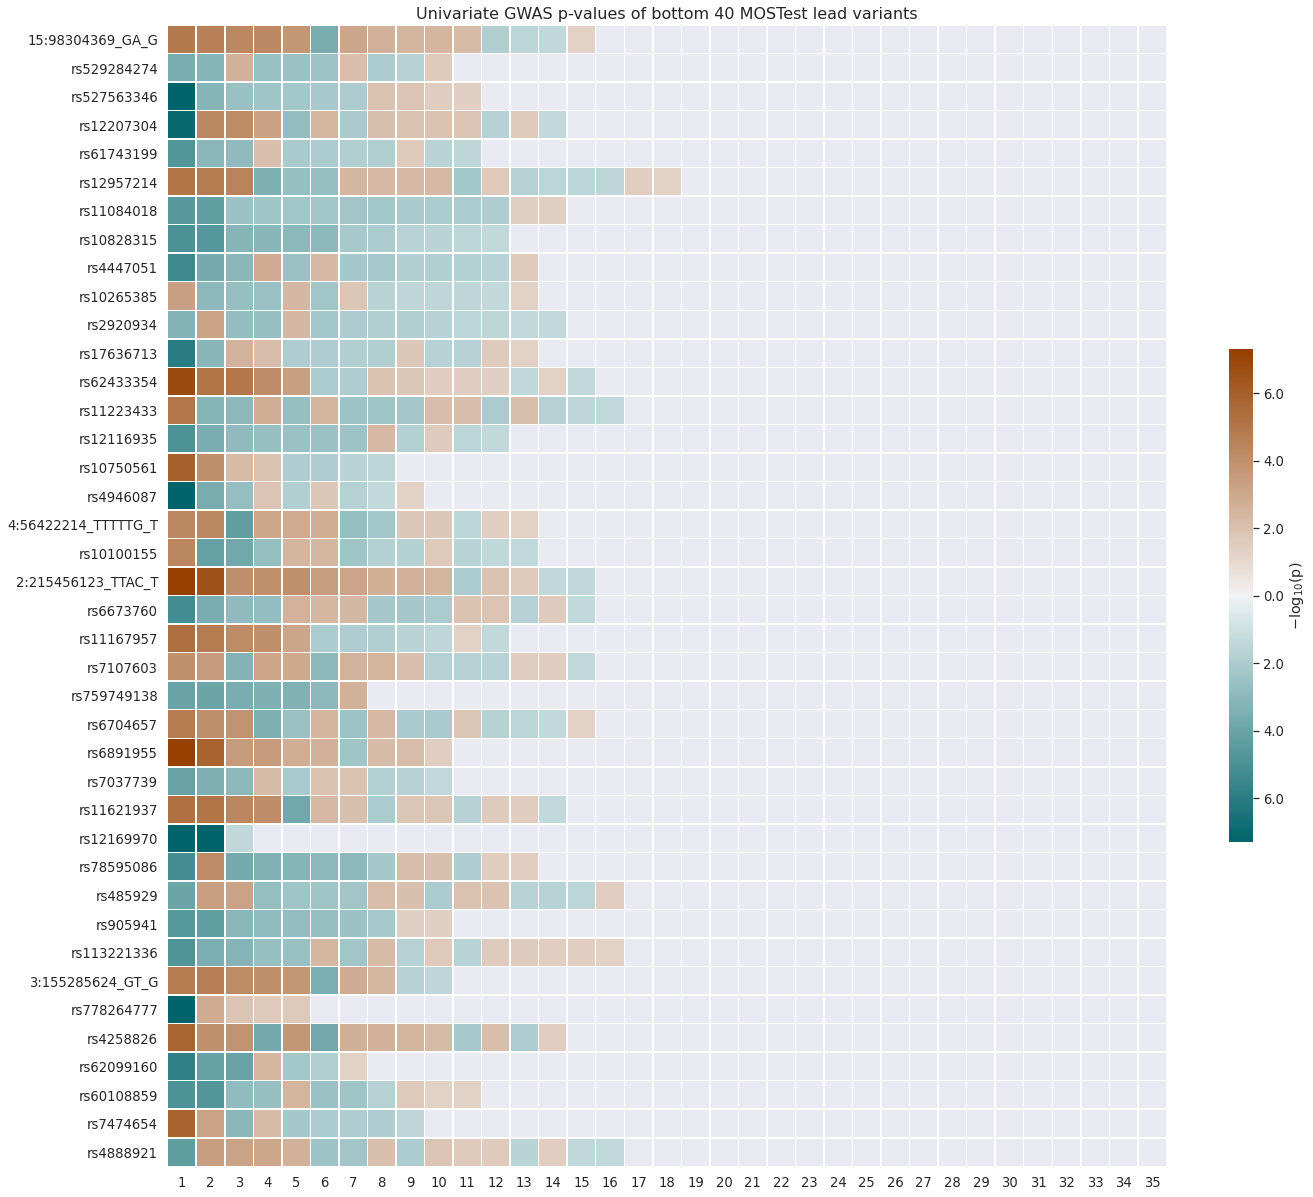

In [22]:
# Plot distributed effects as heatmap

lead_df_plot = lead_df.tail(40).copy()
n_lead = lead_df_plot.shape[0]

outf = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_bottom40_heatmap"
formats = ['png', 'svg']
savefig = False
title = f"Univariate GWAS p-values of bottom 40 MOSTest lead variants"


n_personality = personality_df.shape[1]
personality_pvals = -np.log10(personality_df.loc[lead_df_plot.LEAD_SNP,:].values)

n_cognition = cognition_df.shape[1]
cognition_pvals = -np.log10(cognition_df.loc[lead_df_plot.LEAD_SNP,:].values)

pvals_mat = np.hstack([cognition_pvals, personality_pvals]) # first 22 elements in each row are cognition, last 13 - neuroticism
i_sort = np.argsort(pvals_mat)
#i_cognition = i_sort < cognition_df.shape[1]
pvals_mat[:,:cognition_df.shape[1]] *= -1 # make cognition values negative
row_col_idx = np.arange(pvals_mat.shape[0])[:,None] # https://stackoverflow.com/questions/20103779/index-2d-numpy-array-by-a-2d-array-of-indices-without-loops
pvals_mat = np.flip(pvals_mat[row_col_idx, i_sort], axis=1)

sns.set(font_scale=1.2) 
fig, ax = plt.subplots(1,1,figsize=(20,20))
gwas_thresh = -np.log10(5E-8)
nominal_threshold = -np.log10(0.05)
mask = np.abs(pvals_mat) < nominal_threshold
cmap = sns.diverging_palette(202, 26, 100, 38, as_cmap=True)
sns.heatmap(pvals_mat, vmin=-gwas_thresh, vmax=gwas_thresh, square=True, linewidths=.5,
            center=0, cmap=cmap, cbar_kws={"shrink": .35, 'label': r"$\mathrm{-log_{10}(p)}$"},
            ax=ax, mask=mask, xticklabels=np.arange(pvals_mat.shape[1])+1, yticklabels=lead_df_plot.LEAD_SNP)
#ax.set_yticks(np.arange(pvals_mat.shape[0]) + 0.5)
#_ = ax.set_yticklabels(lead_df_plot.LEAD_SNP, fontsize=12, rotation=0)
#ax.set_xticks(np.arange(pvals_mat.shape[1]) + 0.5)
#_ = ax.set_xticklabels(map(str, np.arange(pvals_mat.shape[1])+1), fontsize=12)

cbar_ax = fig.get_axes()[1]
cbar_ticks = cbar_ax.get_yticks()
abs_cbar_ticklabels = map(str, map(abs, cbar_ticks))
cbar_ax.set_yticklabels(abs_cbar_ticklabels)

ax.set_title(title, fontsize=16)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

## Figure with trait names

In [27]:
# keep trait names
N=35
lead_df_plot = lead_df.head(N).copy()
personality_lead_df = personality_df.loc[lead_df_plot.LEAD_SNP,:]
cognition_lead_df = cognition_df.loc[lead_df_plot.LEAD_SNP,:]
# trait_order is taken from rg-bsed clustering
trait_order = ['1940_0_0', '2020_0_0', '20127_0_0_quant', '1930_0_0', '1960_0_0', '1920_0_0', '1990_0_0', '1980_0_0', '2010_0_0', '1970_0_0', '1950_0_0', '2030_0_0', '2000_0_0', '20023_0_0_quant', '6350_2_0_quant', '6348_2_0_quant', '23324_2_0_quant', '399_0_2_quant', '400_0_2_quant', '21004_2_0_quant', '399_0_1', '400_0_1_quant', '4282_0_0_quant', '4294_0_0', '4979_0_0', '6373_2_0_quant', '5790_0_0', '5699_0_0', '4968_0_0', '5556_0_0', '4990_0_0', '5012_0_0', '5001_0_0', '4957_0_0', '20016_0_0_quant']
merged_df_heatmap = personality_lead_df.join(cognition_lead_df)
merged_df_heatmap = merged_df_heatmap[trait_order]
pvals_mat = -np.log10(merged_df_heatmap.values)
#pvals_mat[:,13:] = -1*pvals_mat[:,13:]

<ipython-input-24-cf8ccbdce187>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar_ax.set_yticklabels(abs_cbar_ticklabels)


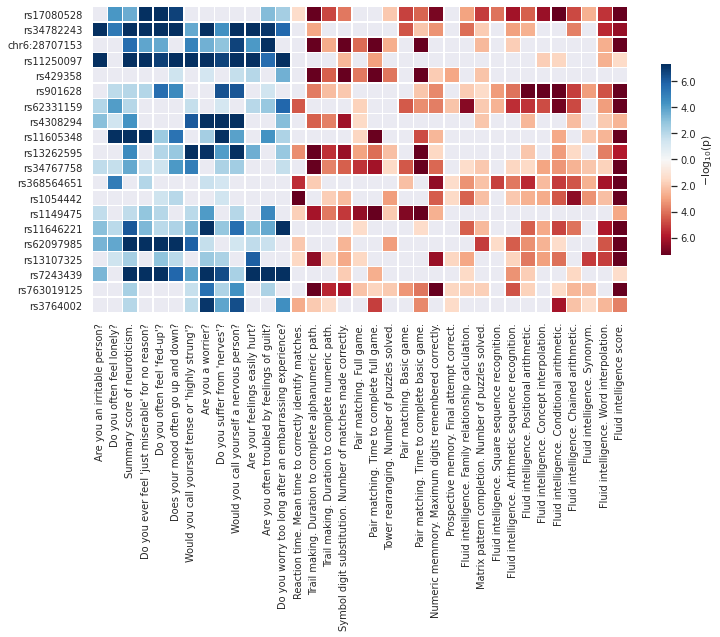

In [24]:
# X - variants
# Y - traits
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_top{N}_heatmap_horizontal_ordered"
formats = ['png', 'svg']
savefig = False

if pvals_mat.shape[0] > pvals_mat.shape[1]:
    pvals_mat = pvals_mat.T
sns.set(font_scale=0.9) 

fig, ax = plt.subplots(1,1,figsize=(12,10))

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
gwas_thresh = -np.log10(5E-8)
nominal_threshold = -np.log10(0.05)
mask = np.abs(pvals_mat) < nominal_threshold
cmap = sns.diverging_palette(202, 26, 100, 38, as_cmap=True)
sns.heatmap(pvals_mat, vmin=-gwas_thresh, vmax=gwas_thresh, square=True, linewidths=.5,
            center=0, cmap='RdBu', cbar_kws={"shrink": .35, 'label': r"$\mathrm{-log_{10}(p)}$"},
            ax=ax, mask=mask, xticklabels=trait_labels, yticklabels=snp_labels)
cbar_ax = fig.get_axes()[1]
cbar_ticks = cbar_ax.get_yticks()
abs_cbar_ticklabels = map(str, map(abs, cbar_ticks))
cbar_ax.set_yticklabels(abs_cbar_ticklabels)
#plt.tight_layout()

if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

<ipython-input-29-d2296333ea72>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar_ax.set_yticklabels(abs_cbar_ticklabels)


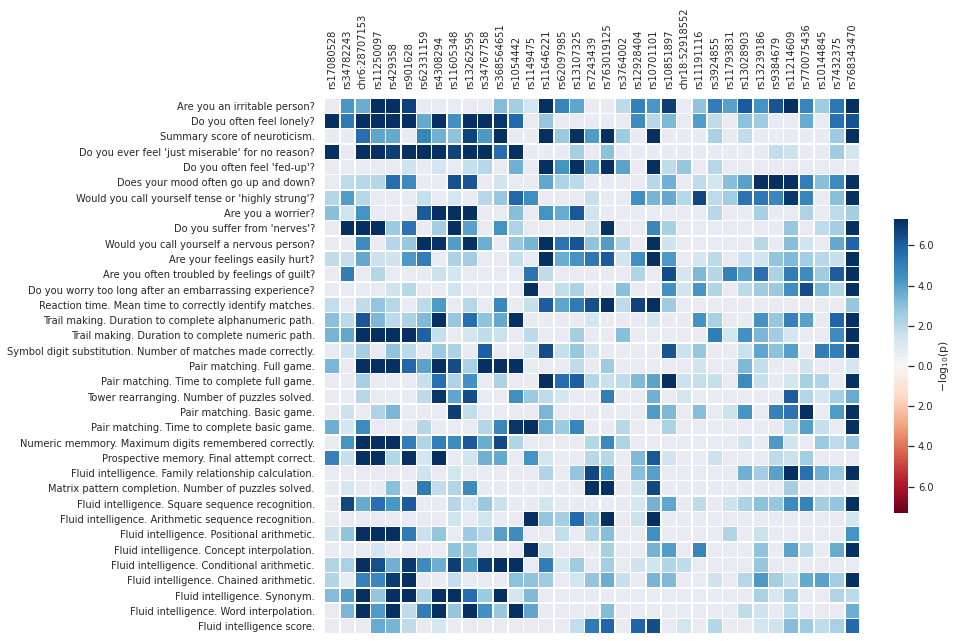

In [29]:
# X - traits
# Y - variants
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_top{N}_heatmap_vertical_ordered"
formats = ['png', 'svg']
savefig = False

if pvals_mat.shape[0] < pvals_mat.shape[1]:
    pvals_mat = pvals_mat.T
sns.set(font_scale=0.9) 

fig, ax = plt.subplots(1,1,figsize=(12,12))

trait_labels = [id_var_dict[t] for t in trait_order]
snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
gwas_thresh = -np.log10(5E-8)
nominal_threshold = -np.log10(0.05)
mask = np.abs(pvals_mat) < nominal_threshold
cmap = sns.diverging_palette(202, 26, 100, 38, as_cmap=True)
sns.heatmap(pvals_mat, vmin=-gwas_thresh, vmax=gwas_thresh, square=True, linewidths=.5,
            center=0, cmap='RdBu', cbar_kws={"shrink": .45, 'label': r"$\mathrm{-log_{10}(p)}$"},
            ax=ax, mask=mask, xticklabels=snp_labels, yticklabels=trait_labels)
cbar_ax = fig.get_axes()[1]
cbar_ticks = cbar_ax.get_yticks()
abs_cbar_ticklabels = map(str, map(abs, cbar_ticks))
cbar_ax.set_yticklabels(abs_cbar_ticklabels)
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, rotation=90)
#plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

In [ ]:
# event plot
N = 10
lead_df_plot = lead_df.head(N).copy()
personality_lead_df = personality_df.loc[lead_df_plot.LEAD_SNP,:]
cognition_lead_df = cognition_df.loc[lead_df_plot.LEAD_SNP,:]
merged_df = pd.concat([personality_lead_df, cognition_lead_df], axis=1)
merged_df = merged_df[trait_order]
merged_df

In [ ]:
id_var_dict = {'2020_0_0': "Do you often feel lonely?",
               '2010_0_0': "Do you suffer from 'nerves'?",
               '2030_0_0': "Are you often troubled by feelings of guilt?",
               '1990_0_0': "Would you call yourself tense or 'highly strung'?",
               '1950_0_0': "Are your feelings easily hurt?",
               '1930_0_0': "Do you ever feel 'just miserable' for no reason?",
               '1970_0_0': "Would you call yourself a nervous person?",
               '2000_0_0': "Do you worry too long after an embarrassing experience?",
               '1940_0_0': "Are you an irritable person?",
               '1960_0_0': "Do you often feel 'fed-up'?",
               '1920_0_0': "Does your mood often go up and down?",
               '1980_0_0': "Are you a worrier?",
        '20127_0_0_quant': "Summary score of neuroticism.",
                '399_0_1': "Pair matching. Basic game.",
               '4294_0_0': "Prospective memory. Final attempt correct.",
               '4979_0_0': "Fluid intelligence. Family relationship calculation.",
               '5001_0_0': "Fluid intelligence. Synonym.",
          '399_0_2_quant': "Pair matching. Full game.",
               '4968_0_0': "Fluid intelligence. Positional arithmetic.",
          '400_0_1_quant': "Pair matching. Time to complete basic game.",
               '4957_0_0': "Fluid intelligence. Word interpolation.",
          '400_0_2_quant': "Pair matching. Time to complete full game.",
         '6348_2_0_quant': "Trail making. Duration to complete numeric path.",
               '4990_0_0': "Fluid intelligence. Conditional arithmetic.",
        '20023_0_0_quant': "Reaction time. Mean time to correctly identify matches.",
               '5012_0_0': "Fluid intelligence. Chained arithmetic.",
        '23324_2_0_quant': "Symbol digit substitution. Number of matches made correctly.",
        '21004_2_0_quant': "Tower rearranging. Number of puzzles solved.",
         '4282_0_0_quant': "Numeric memmory. Maximum digits remembered correctly.",
               '5556_0_0': "Fluid intelligence. Concept interpolation.",
         '6350_2_0_quant': "Trail making. Duration to complete alphanumeric path.",
               '5790_0_0': "Fluid intelligence. Square sequence recognition.",
         '6373_2_0_quant': "Matrix pattern completion. Number of puzzles solved.",
               '5699_0_0': "Fluid intelligence. Arithmetic sequence recognition.",
        '20016_0_0_quant': "Fluid intelligence score."}
var_id_dict = {v:k for k,v in id_var_dict.items()}

In [ ]:
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_top{N}_wideticks_ordered"
formats = ['png', 'svg']
savefig = True

sns.set_style('white')
fig, axs = plt.subplots(1, N, figsize=(16,10), sharey=True, constrained_layout=True)

sig_levels = [5E-2, 5E-3, 5E-4, 5E-5, 5E-6, 5E-7, 5E-8]
xticks = np.linspace(0,1,len(sig_levels))

colors = ['#1f77b4']*13 + ['#ff7f0e']*22

ylabels = [id_var_dict[t] for t in trait_order] # list(var_id_dict)
var_ids = trait_order
yticks = np.linspace(0,1,len(ylabels))

axs[0].set_yticks(yticks)
axs[0].set_yticklabels(ylabels)

for ax, snp in zip(axs, merged_df.index):
    positions = [[x for x,s in zip (xticks,sig_levels) if p<s] for p in merged_df.loc[snp,var_ids]]
    title = snp if snp.startswith("rs") else f"chr{snp.split('_')[0]}"
    ax.set_title(title, fontsize=10)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.eventplot(positions, lineoffsets=yticks, orientation='horizontal', linelengths=0.8/merged_df.shape[1],
                linewidths=8.5, colors=colors)
    ax.set_xlim((-0.1,1.1))
    ax.set_ylim((-0.01,1.02))
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

In [ ]:
# same as above with bars
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_top{N}_solidbars_ordered"
formats = ['png', 'svg']
savefig = True

sns.set_style('white')
fig, axs = plt.subplots(1, N, figsize=(16,10), sharey=True, constrained_layout=True)

sig_levels = [5E-2, 5E-3, 5E-4, 5E-5, 5E-6, 5E-7, 5E-8]
xticks = np.linspace(0,1,len(sig_levels))

colors = ['#1f77b4']*13 + ['#ff7f0e']*22

ylabels = [id_var_dict[t] for t in trait_order] # list(var_id_dict)
var_ids = trait_order
yticks = np.linspace(0,1,len(ylabels))

axs[0].set_yticks(yticks)
axs[0].set_yticklabels(ylabels)

for ax, snp in zip(axs, merged_df.index):
    positions = [[x for x,s in zip (xticks,sig_levels) if p<s] for p in merged_df.loc[snp,var_ids]]
    bar_len = [len(l)/len(sig_levels) for l in positions]
    positions = [p[1:-1] if p else p for p in positions]
    title = snp if snp.startswith("rs") else f"chr{snp.split('_')[0]}"
    ax.set_title(title, fontsize=10)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.barh(yticks, bar_len, height=0.8/merged_df.shape[1], color=colors)
    ax.set_xlim((-0.1,1.05))
    ax.set_ylim((-0.01,1.02))
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

In [ ]:
yticks

## Genetic + Phenotypic correlations and clustering

In [3]:
# rg
rg_dir = "/cluster/projects/p33/users/alexeas/most_mental/new_start/ldsr/rg"
h2_dir_touchscreen = "/cluster/projects/p33/users/alexeas/most_mental/new_start/ldsr/h2/touchscreen"
h2_dir_cognition = "/cluster/projects/p33/users/alexeas/most_mental/new_start/ldsr/h2/cognition"

def parse_rg(rg_dir):
    # { frozenset([trait1,trait2]) : (rg, pval) }
    rg_dict = {}
    for de in os.scandir(rg_dir):
        trait1, trait2 = de.name.split('.')[0].split('_vs_')
        with open(de.path) as f:
            for l in f:
                if l.startswith("Genetic Correlation:"):
                    if 'nan' in l:
                        rg, pval = 0.0, 1.0
                    else:
                        rg, se = map(float, l.split(':')[1].replace('(','').replace(')','').split())
                        pval = ss.norm.cdf(0, loc=abs(rg), scale=se) # one sieded p-value
                    rg_dict[frozenset((trait1,trait2))] = (rg, pval)
                    break
    return rg_dict


def parse_h2(h2_dir):
    h2_dict = {}
    for de in os.scandir(h2_dir):
        trait = de.name.split('.')[0]
        with open(de.path) as f:
            for l in f:
                if l.startswith("Total Observed scale h2:"):
                    h2, se = map(float, l.split(':')[1].replace('(','').replace(')','').split())
                    h2 = max(h2, 0)
                    pval = ss.norm.cdf(0, loc=h2, scale=se) # one sieded p-value
                    h2_dict[trait] = (h2, pval)
    return h2_dict


rg_dict = parse_rg(rg_dir)
h2_dict_touchscreen = parse_h2(h2_dir_touchscreen)
h2_dict_cognition = parse_h2(h2_dir_cognition)

rg_mat = np.ones((len(trait_order),len(trait_order)), dtype='f8')
rg_p_mat = np.ones_like(rg_mat)

for i, t1 in enumerate(trait_order):
    for j, t2 in enumerate(trait_order):
        if i > j:
            corr, corr_p = rg_dict[frozenset([t1,t2])]
            if (t1 in swap_sign) ^ (t2 in swap_sign):
                corr *= -1
            rg_mat[i][j] = corr
            rg_mat[j][i] = corr
            rg_p_mat[i][j] = corr_p
            rg_p_mat[j][i] = corr_p

In [4]:
# rp
from scipy.stats import pearsonr, kendalltau, spearmanr
pheno_dir = "/cluster/projects/p33/users/alexeas/most_mental/pheno"

cog_pheno_fname = os.path.join(pheno_dir, "cognitive_merged_27_20.processed.csv")
cog_pheno_df = pd.read_table(cog_pheno_fname)
del cog_pheno_df["FID"]

neur_noscore_pheno_fname = os.path.join(pheno_dir, "touchscreen_23_binary.translated.csv")
neur_noscore_pheno_df = pd.read_table(neur_noscore_pheno_fname)
del neur_noscore_pheno_df["FID"]
neur_score_pheno_fname = os.path.join(pheno_dir, "touchscreen_20127.processed.csv")
neur_score_pheno_df = pd.read_table(neur_score_pheno_fname)
del neur_score_pheno_df["FID"]
neur_pheno_df = pd.merge(neur_noscore_pheno_df, neur_score_pheno_df, on="IID")

merged_pheno_df = pd.merge(neur_pheno_df, cog_pheno_df, on="IID")

fam_fname = "/cluster/projects/p33/projects/mental/geno/generic_qc/ukb_imp_chr1_v3_qc.fam"
ids = pd.read_table(fam_fname, usecols=[1], header=None, names=["IID"], squeeze=True, delim_whitespace=True)

# Take a subset of individuals used in GWAS
merged_pheno_df = merged_pheno_df[merged_pheno_df.IID.isin(ids)]
# Take only traits used for the best mostest analysis
merged_pheno_df = merged_pheno_df[[c for c in merged_pheno_df.columns if c in id_var_dict]]

# For 1, 2 coded binary phenotypes translate 0 to NA, 1 to 0, 2 to 1.
for col in merged_pheno_df.columns:
    if not col.endswith('_quant'):
        if 2 in merged_pheno_df[col].values:
            merged_pheno_df[col] -= 1
            merged_pheno_df.loc[merged_pheno_df[col]<0,col] = np.nan

# If both pheno are binary estimate similarity as dice coeff, if either is continuous as pearson correlation.
traits = merged_pheno_df.columns
rp_mat = np.ones((len(trait_order),len(trait_order)), dtype='f8')
rp_p_mat = np.ones_like(rp_mat)
for i, t1 in enumerate(trait_order):
    for j, t2 in enumerate(trait_order):
        if i > j:
            corr, p = spearmanr(merged_pheno_df[t1], merged_pheno_df[t2], nan_policy='omit')
            if (t1 in swap_sign) ^ (t2 in swap_sign):
                corr *= -1
            rp_mat[i,j] = corr
            rp_mat[j,i] = corr
            rp_p_mat[i][j] = p
            rp_p_mat[j][i] = p

rp_mat[1:5,1:5]

array([[1.        , 0.4570394 , 0.30498302, 0.3719891 ],
       [0.4570394 , 1.        , 0.64742608, 0.65393581],
       [0.30498302, 0.64742608, 1.        , 0.51576181],
       [0.3719891 , 0.65393581, 0.51576181, 1.        ]])

In [5]:
corr_table_df = pd.DataFrame(columns=["T1_fid", "T2_fid", "rg", "rg_p", "rp", "rp_p", "T1", "T2"])
for i,t1_fid in enumerate(trait_order):
    for j,t2_fid in enumerate(trait_order):
        if j>i:
            rg = rg_mat[i,j]
            rg_p = rg_p_mat[i,j]
            rp = rp_mat[i,j]
            rp_p = rp_p_mat[i,j]
            t1 = id_var_dict[t1_fid]
            t2 = id_var_dict[t2_fid]
            corr_table_df.loc[len(corr_table_df)] = [t1_fid, t2_fid, rg, rg_p, rp, rp_p, t1, t2]
corr_table_df.head()

,T1_fid,T2_fid,rg,rg_p,rp,rp_p,T1,T2
0,1940_0_0,2020_0_0,0.5660,1.997079e-94,0.162127,0.0,Are you an irritable person?,Do you often feel lonely?
1,1940_0_0,20127_0_0_quant,0.7589,0.000000e+00,0.505464,0.0,Are you an irritable person?,Summary score of neuroticism.
2,1940_0_0,1930_0_0,0.6899,4.041541e-218,0.290637,0.0,Are you an irritable person?,Do you ever feel 'just miserable' for no reason?
3,1940_0_0,1960_0_0,0.6845,1.637134e-267,0.339338,0.0,Are you an irritable person?,Do you often feel 'fed-up'?
4,1940_0_0,1920_0_0,0.7660,0.000000e+00,0.398299,0.0,Are you an irritable person?,Does your mood often go up and down?


In [11]:
outf = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/tables/mental_mostest_rg_rp.csv"
corr_table_df.to_csv(outf, sep='\t', index=False)

In [6]:
# rg = upper triangle, rp = lower triangle
corr_mat = np.tril(rp_mat) + np.triu(rg_mat)
p_mat = np.tril(rp_p_mat) + np.triu(rg_p_mat)

In [10]:
corr_mat[0,1], corr_mat[1,0]

(0.566, 0.162126666537867)

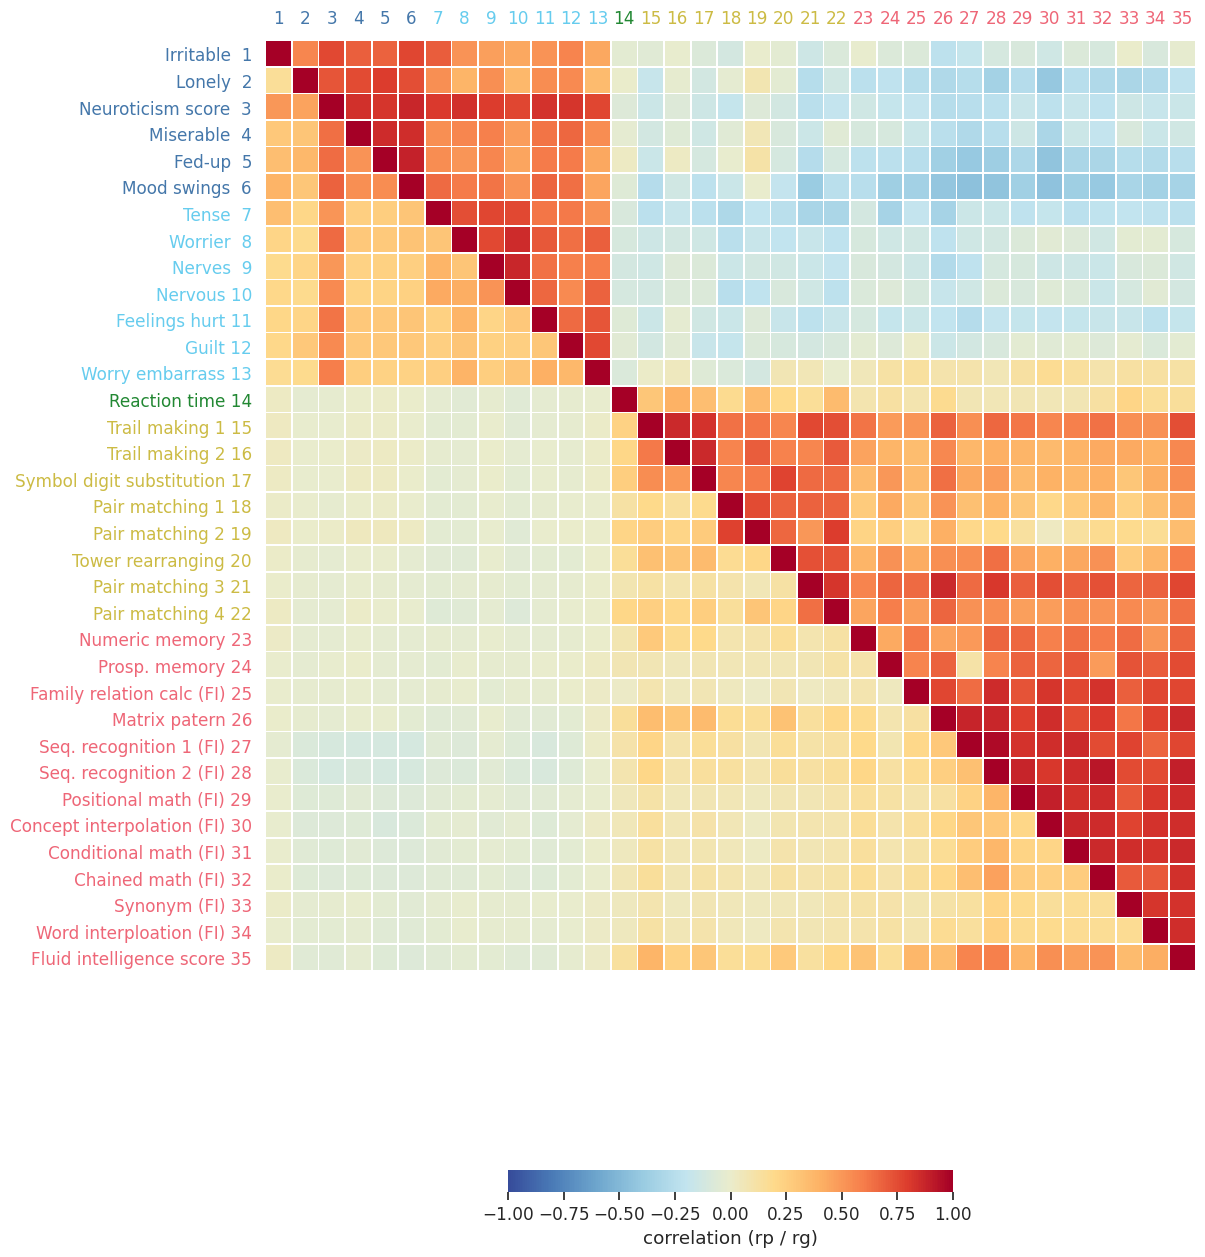

In [134]:
sns.set_style(style='white')
sns.color_palette("tab10")
sns.set(font_scale=1.1)

outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/rg_rp_heatmap_5clusters_sunset"
formats = ['png', 'svg']
savefig = True

fig, ax = plt.subplots(1,1,figsize=(14,14))

# custom colormap in matplotlib: https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html
sunset_colors = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF', '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D', '#A50026']
sunset_cmap = LinearSegmentedColormap.from_list("sunset", sunset_colors)

# seismic
sns.heatmap(corr_mat, vmin=-1, vmax=1, square=True, linewidths=.5, center=0, cmap=sunset_cmap,
            cbar_kws={"shrink": .35, 'label': "correlation (rp / rg)", "orientation":"horizontal"}, ax=ax)
ax.set_yticks(np.arange(corr_mat.shape[0]) + 0.5)
yticklabels = [f"{id_var_dict[t]} {i+1:2d}" for i, t in enumerate(trait_order)]
_ = ax.set_yticklabels(yticklabels, rotation=0)
ax.set_xticks(np.arange(corr_mat.shape[0]) + 0.5)
ax.set_xticklabels([f"{i+1}" for i in range(len(trait_order))])


#cbar_ax = fig.get_axes()[1]
#cbar_ticks = cbar_ax.get_yticks()
#abs_cbar_ticklabels = map(str, map(abs, cbar_ticks))
#cbar_ax.set_yticklabels(abs_cbar_ticklabels)

ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)

trait_order = ['1940_0_0', '2020_0_0', '20127_0_0_quant', '1930_0_0', '1960_0_0', '1920_0_0', '1990_0_0', '1980_0_0', '2010_0_0', '1970_0_0', '1950_0_0', '2030_0_0', '2000_0_0', '20023_0_0_quant', '6350_2_0_quant', '6348_2_0_quant', '23324_2_0_quant', '399_0_2_quant', '400_0_2_quant', '21004_2_0_quant', '399_0_1', '400_0_1_quant', '4282_0_0_quant', '4294_0_0', '4979_0_0', '6373_2_0_quant', '5790_0_0', '5699_0_0', '4968_0_0', '5556_0_0', '4990_0_0', '5012_0_0', '5001_0_0', '4957_0_0', '20016_0_0_quant']
# 5 clusters
# [4 4 4 4 4 4 1 1 1 1 1 1 1 2 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"

for trait, tly, tlx in zip(trait_order, ax.get_yticklabels(),ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tly.set_color(cluster_1_color)
        tlx.set_color(cluster_1_color)
    elif trait in cluster_2:
        tly.set_color(cluster_2_color)
        tlx.set_color(cluster_2_color)
    elif trait in cluster_3:
        tly.set_color(cluster_3_color)
        tlx.set_color(cluster_3_color)
    elif trait in cluster_4:
        tly.set_color(cluster_4_color)
        tlx.set_color(cluster_4_color)
    else:
        tly.set_color(cluster_5_color)
        tlx.set_color(cluster_5_color)

plt.tight_layout()

if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()


[4 4 4 4 4 4 1 1 1 1 1 1 1 2 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0]


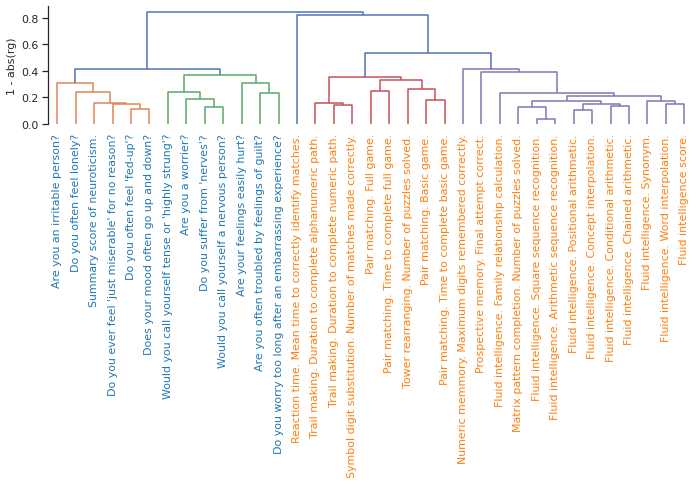

['1940_0_0', '2020_0_0', '20127_0_0_quant', '1930_0_0', '1960_0_0', '1920_0_0', '1990_0_0', '1980_0_0', '2010_0_0', '1970_0_0', '1950_0_0', '2030_0_0', '2000_0_0', '20023_0_0_quant', '6350_2_0_quant', '6348_2_0_quant', '23324_2_0_quant', '399_0_2_quant', '400_0_2_quant', '21004_2_0_quant', '399_0_1', '400_0_1_quant', '4282_0_0_quant', '4294_0_0', '4979_0_0', '6373_2_0_quant', '5790_0_0', '5699_0_0', '4968_0_0', '5556_0_0', '4990_0_0', '5012_0_0', '5001_0_0', '4957_0_0', '20016_0_0_quant']


In [104]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    res = dendrogram(linkage_matrix, **kwargs)
    #print(res['leaves_color_list'])
    
distmat = 1 - np.abs(rg_mat)
model = AgglomerativeClustering(n_clusters=5,linkage='average',affinity='precomputed',compute_distances=True)
model = model.fit(distmat)

print(model.labels_)

sns.set_style(style='ticks')
savefig = True
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/rg_clustering_left_5clusters"
formats = ['png', 'svg']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
labels = [id_var_dict[t] for t in trait_order] # ['neur']*13 + ['cognition']*22
plot_dendrogram(model,color_threshold=0.415,orientation='top',labels=labels,ax=ax)
ax.set_ylabel('1 - abs(rg)', fontsize=11)
color_neur = '#1f77b4'
color_cognition = '#ff7f0e'
clustered_trait_order = []
for tlx in ax.get_xticklabels():
    trait = var_id_dict[tlx.get_text()]
    clustered_trait_order.append(trait)
    if trait in h2_dict_touchscreen:
        tlx.set_color(color_neur)
    else:
        tlx.set_color(color_cognition)
#ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()
ax.tick_params(axis='both', labelsize=11)
ax.tick_params(axis='x', rotation=90)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()
print(clustered_trait_order)

[3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 1 2 4 0 1 1 1 1 1 1 1 1 1]


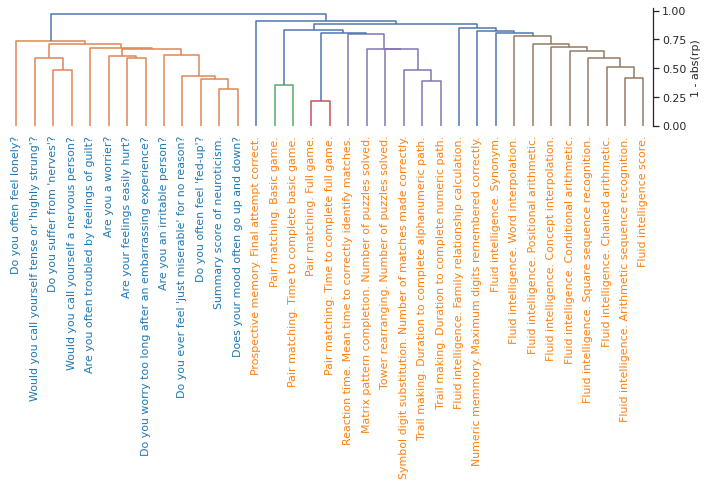

In [89]:
distmat = 1 - np.abs(rp_mat)
model = AgglomerativeClustering(n_clusters=5,linkage='average',affinity='precomputed',compute_distances=True)
model = model.fit(distmat)

print(model.labels_)

sns.set_style(style='ticks')
savefig = False
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/rp_clustering"
formats = ['png', 'svg']
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
labels = [id_var_dict[t] for t in trait_order] # ['neur']*13 + ['cognition']*22
plot_dendrogram(model,color_threshold=0.8,orientation='top',labels=labels,ax=ax)
ax.set_ylabel('1 - abs(rp)', fontsize=11)
color_neur = '#1f77b4'
color_cognition = '#ff7f0e'
clustered_trait_order = []
for tlx in ax.get_xticklabels():
    trait = var_id_dict[tlx.get_text()]
    clustered_trait_order.append(trait)
    if trait in h2_dict_touchscreen:
        tlx.set_color(color_neur)
    else:
        tlx.set_color(color_cognition)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.tick_params(axis='both', labelsize=11)
ax.tick_params(axis='x', rotation=90)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()
#print(clustered_trait_order)

# heatmap with effect directions

In [3]:
data_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures"
fname_neur = os.path.join(data_dir, "personality13.most.eig3.all.zscore.csv.gz")
fname_cog = os.path.join(data_dir, "cognition22.most.eig3.all.zscore.csv.gz")
df_neur = pd.read_table(fname_neur, index_col="ID")
df_cog = pd.read_table(fname_cog, index_col="ID")
df_neur_cog = df_neur.join(df_cog) #.fillna(0)

lead_snps_file = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/clump/personality13_cognition22_eig3.most.orig.loci.csv"
lead_df = pd.read_table(lead_snps_file)
lead_df.sort_values(by="PVAL",inplace=True)

In [4]:
lead_df.shape

(431, 7)

In [5]:
N=431
lead_df_plot = lead_df.head(N).copy()
df_neur_cog_lead = df_neur_cog.loc[lead_df_plot.LEAD_SNP,:]
# trait_order is taken from rg-bsed clustering
trait_order = ['1940_0_0', '2020_0_0', '20127_0_0_quant', '1930_0_0', '1960_0_0', '1920_0_0', '1990_0_0', '1980_0_0', '2010_0_0', '1970_0_0', '1950_0_0', '2030_0_0', '2000_0_0', '20023_0_0_quant', '6350_2_0_quant', '6348_2_0_quant', '23324_2_0_quant', '399_0_2_quant', '400_0_2_quant', '21004_2_0_quant', '399_0_1', '400_0_1_quant', '4282_0_0_quant', '4294_0_0', '4979_0_0', '6373_2_0_quant', '5790_0_0', '5699_0_0', '4968_0_0', '5556_0_0', '4990_0_0', '5012_0_0', '5001_0_0', '4957_0_0', '20016_0_0_quant'] # list(id_var_dict)
df_neur_cog_lead = df_neur_cog_lead[trait_order]
z_mat = df_neur_cog_lead.values.copy()

In [125]:
# normalize z-scores according to median z^2
#median_z2_all = (df_neur_cog_lead[trait_order]**2).median(axis=0)
#max_z2 = median_z2_all.max()
#trait_z_dict = dict(zip(median_z2_all.index, median_z2_all))
#for i,t in enumerate(trait_order):
#    z_mat[:,i] *= max_z2/trait_z_dict[t]

-10.041637612175576


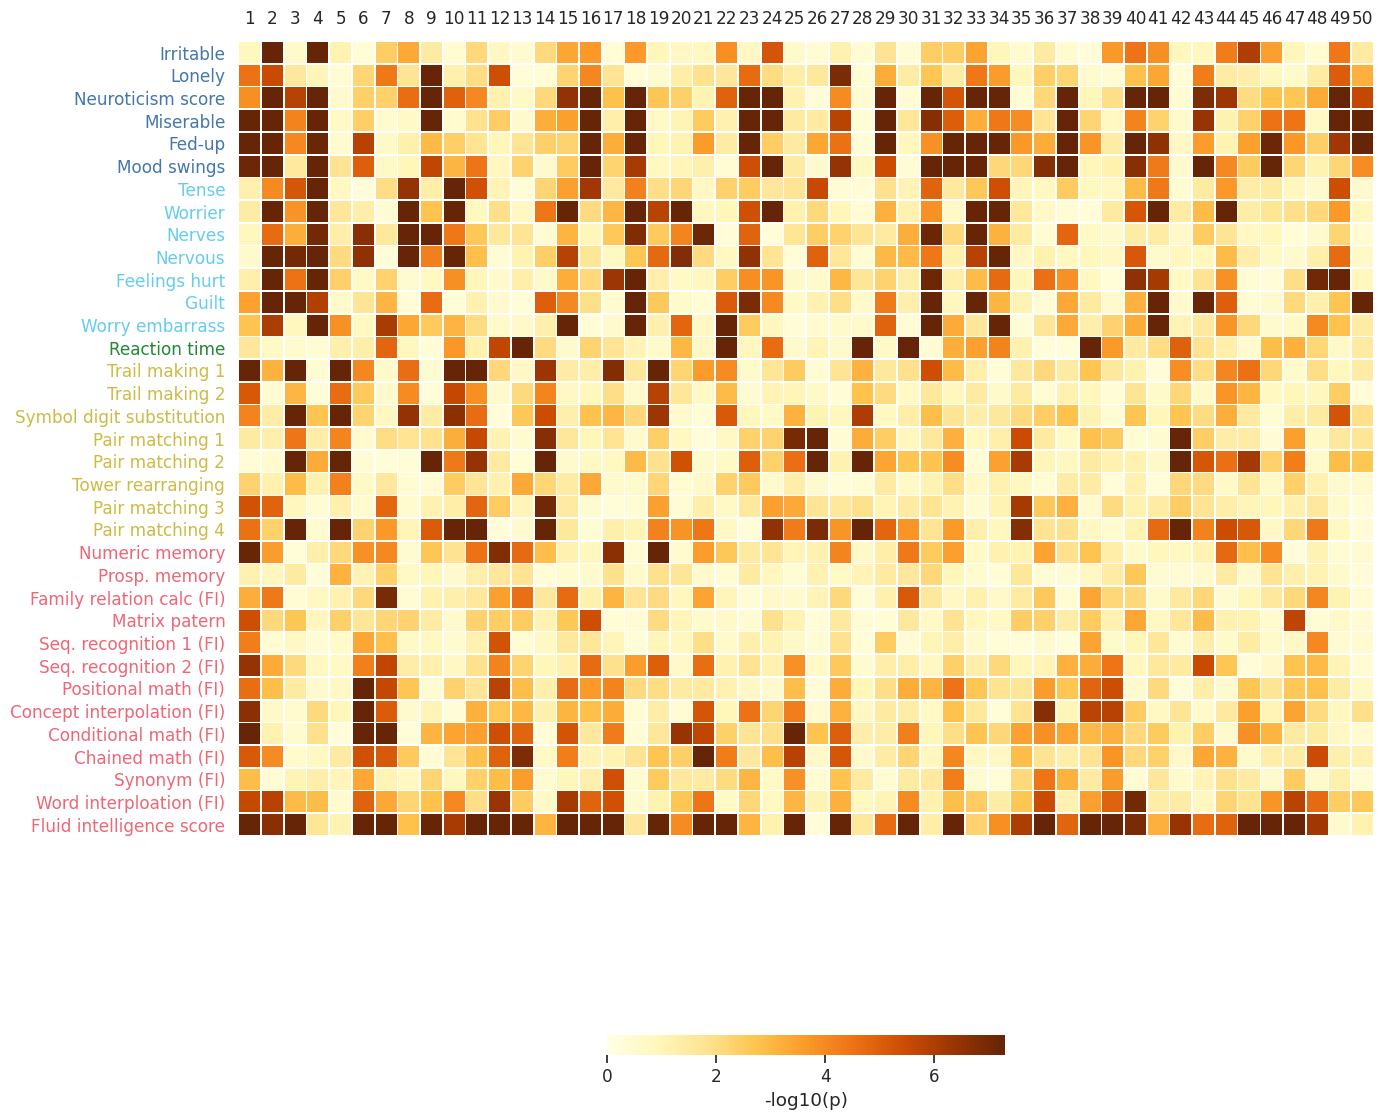

In [137]:
# X - traits
# Y - variants
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_top{N}_heatmap_vertical_ordered_pval_ylorbr"
formats = ['png', 'svg']
savefig = True

z_mat = df_neur_cog_lead.values.copy()
z_mat = z_mat.T
sns.set(font_scale=1.1) 

fig, ax = plt.subplots(1,1,figsize=(14,14))

YlOrBr_colors = ['#FFFFE5', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29', '#EC7014', '#CC4C02', '#993404', '#662506']
YlOrBr_cmap = LinearSegmentedColormap.from_list("ylorbr", YlOrBr_colors)

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
# snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
snp_labels = list(map(str, range(1,N+1)))
print(ss.norm.ppf(5E-24))
top_thresh = -np.log10(5E-8)
nominal_threshold = ss.norm.ppf(1E-3)
mask = None # -np.abs(z_mat) > nominal_threshold # 
log10pval = -np.log10(ss.norm.cdf(-np.abs(z_mat)))
sns.heatmap(log10pval, vmin=0, vmax=top_thresh, square=True, linewidths=.5,
            center=None, cmap=YlOrBr_cmap, cbar_kws={"shrink": .35, 'label': "-log10(p)", "orientation": "horizontal"},
            ax=ax, mask=mask, xticklabels=snp_labels, yticklabels=trait_labels)
#cbar_ax = fig.get_axes()[1]
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, rotation=0)

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"

for trait, tly, tlx in zip(trait_order, ax.get_yticklabels(),ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tly.set_color(cluster_1_color)
    elif trait in cluster_2:
        tly.set_color(cluster_2_color)
    elif trait in cluster_3:
        tly.set_color(cluster_3_color)
    elif trait in cluster_4:
        tly.set_color(cluster_4_color)
    else:
        tly.set_color(cluster_5_color)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

-5.326723886384496 5.326723886384496


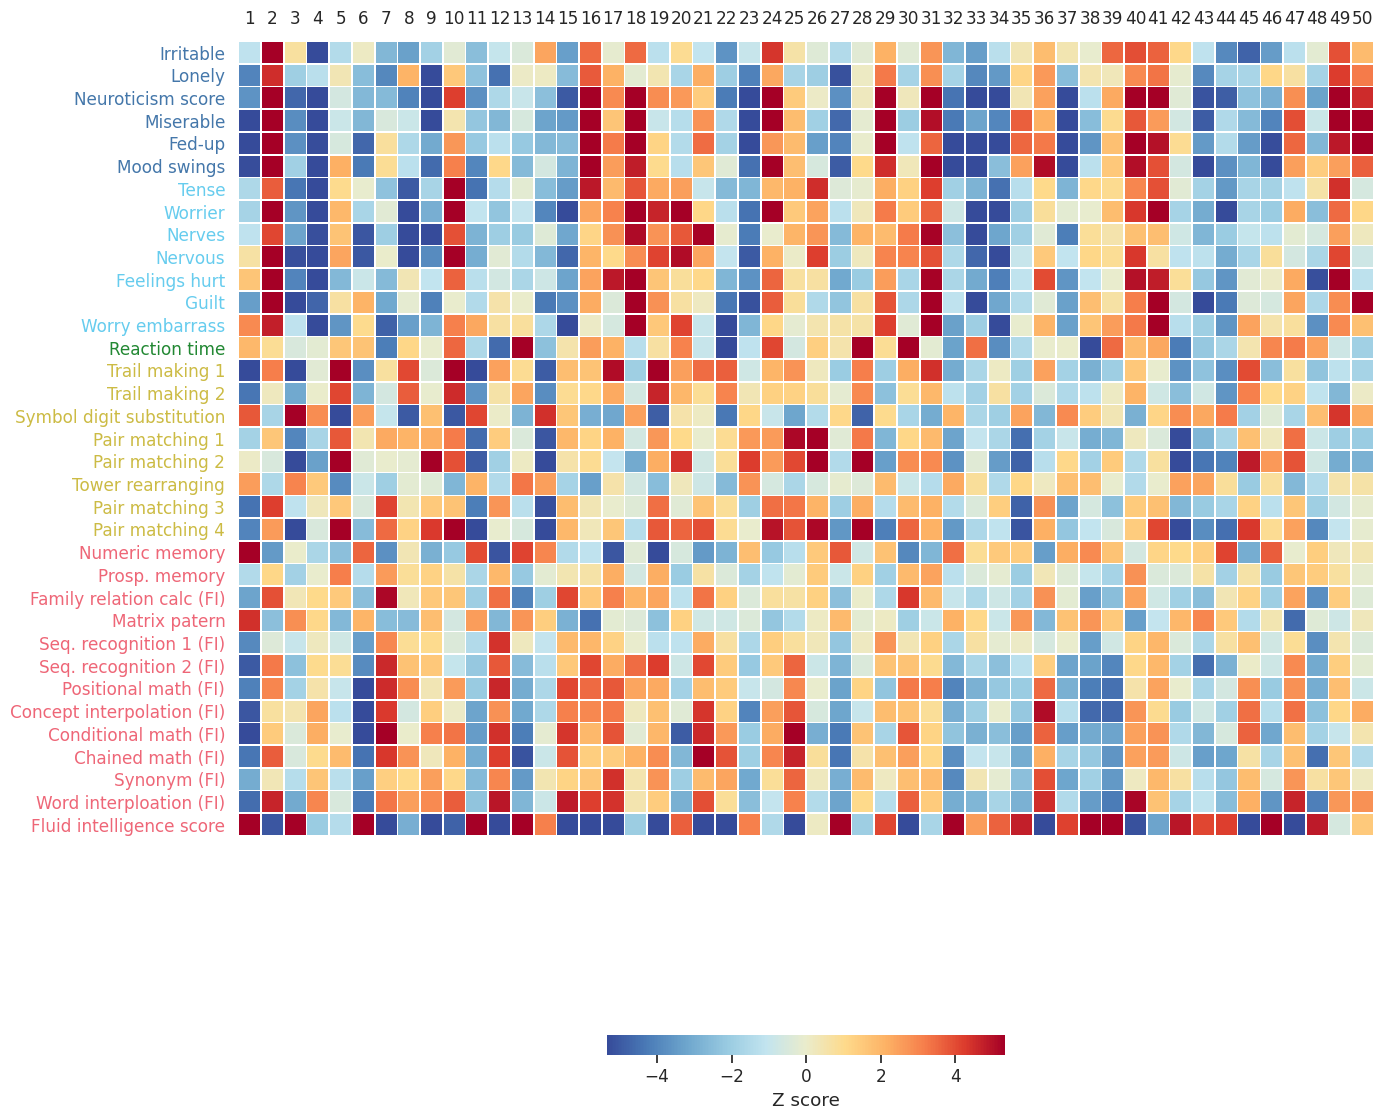

In [139]:
# Z-SCORES
# X - traits
# Y - variants
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_top{N}_heatmap_vertical_ordered_zscore_sunset"
formats = ['png', 'svg']
savefig = True

z_mat = df_neur_cog_lead.values.copy()
z_mat = z_mat.T
sns.set(font_scale=1.1) 

fig, ax = plt.subplots(1,1,figsize=(14,14))

sunset_colors = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF', '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D', '#A50026']
sunset_cmap = LinearSegmentedColormap.from_list("sunset", sunset_colors)

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
#snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
snp_labels = list(map(str, range(1,N+1)))
bottom_thresh = ss.norm.ppf(5E-8)
top_thresh = -bottom_thresh
print(bottom_thresh, top_thresh)
mask = None # -np.abs(z_mat) > nominal_threshold # 
sns.heatmap(z_mat, vmin=bottom_thresh, vmax=top_thresh, square=True, linewidths=.5,
            center=0, cmap=sunset_cmap, cbar_kws={"shrink": .35, 'label': "Z score", "orientation": "horizontal"},
            ax=ax, mask=mask, xticklabels=snp_labels, yticklabels=trait_labels)
#cbar_ax = fig.get_axes()[1]
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, rotation=0)

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"

for trait, tly, tlx in zip(trait_order, ax.get_yticklabels(),ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tly.set_color(cluster_1_color)
    elif trait in cluster_2:
        tly.set_color(cluster_2_color)
    elif trait in cluster_3:
        tly.set_color(cluster_3_color)
    elif trait in cluster_4:
        tly.set_color(cluster_4_color)
    else:
        tly.set_color(cluster_5_color)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

# Circular plots

In [8]:
data_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures"
fname_neur = os.path.join(data_dir, "personality13.most.eig3.all.zscore.csv.gz")
fname_cog = os.path.join(data_dir, "cognition22.most.eig3.all.zscore.csv.gz")
df_neur = pd.read_table(fname_neur, index_col="ID")
df_cog = pd.read_table(fname_cog, index_col="ID")
df_neur_cog = df_neur.join(df_cog) #.fillna(0)

lead_snps_file = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/clump/personality13_cognition22_eig3.most.orig.loci.csv"
lead_df = pd.read_table(lead_snps_file)
lead_df.sort_values(by="PVAL",inplace=True)

In [20]:
N=70
lead_df_plot = lead_df.head(N).copy()
df_neur_cog_lead = df_neur_cog.loc[lead_df_plot.LEAD_SNP,:]
# trait_order is taken from rg-bsed clustering
trait_order = ['1940_0_0', '2020_0_0', '20127_0_0_quant', '1930_0_0', '1960_0_0', '1920_0_0', '1990_0_0', '1980_0_0', '2010_0_0', '1970_0_0', '1950_0_0', '2030_0_0', '2000_0_0', '20023_0_0_quant', '6350_2_0_quant', '6348_2_0_quant', '23324_2_0_quant', '399_0_2_quant', '400_0_2_quant', '21004_2_0_quant', '399_0_1', '400_0_1_quant', '4282_0_0_quant', '4294_0_0', '4979_0_0', '6373_2_0_quant', '5790_0_0', '5699_0_0', '4968_0_0', '5556_0_0', '4990_0_0', '5012_0_0', '5001_0_0', '4957_0_0', '20016_0_0_quant']
df_neur_cog_lead = df_neur_cog_lead[trait_order]
df_neur_cog_lead[swap_sign] *= -1
z_mat = df_neur_cog_lead.values.copy()
log10pval = -np.log10(ss.norm.cdf(-np.abs(z_mat)))
df_neur_cog_lead.head()

,1940_0_0,2020_0_0,20127_0_0_quant,1930_0_0,1960_0_0,1920_0_0,1990_0_0,1980_0_0,2010_0_0,1970_0_0,...,6373_2_0_quant,5790_0_0,5699_0_0,4968_0_0,5556_0_0,4990_0_0,5012_0_0,5001_0_0,4957_0_0,20016_0_0_quant
ID,,,,,,,,,,,,,,,,,,,,,
rs17080528,-1.12902,-4.014320,-3.657640,-5.580820,-6.92035,-5.25762,-1.57572,-1.78252,-1.15200,0.640611,...,4.46396,3.875190,4.952920,4.079350,5.036030,5.637900,4.331020,3.021640,4.550030,8.86097
rs34782243,5.89758,4.522450,9.822590,5.630660,6.72382,8.09467,3.72568,5.90773,4.10989,6.803050,...,-2.43694,0.366056,-3.286390,-3.007110,-0.738897,-1.464020,-3.711600,-0.367266,-4.668380,-5.06482
6:28707153_TTATTA_T,0.71870,-1.931660,-4.684320,-3.798710,-3.73442,-1.90186,-4.36497,-3.59790,-3.23324,-5.215750,...,2.85712,0.928067,2.405460,1.827310,-0.458101,0.425112,0.494724,1.351100,3.054270,7.64250
rs11250097,-7.80069,-1.289880,-9.131240,-6.408160,-5.28315,-5.48967,-6.30629,-9.44934,-5.22851,-7.649540,...,1.11312,-0.233855,-1.027790,-0.571247,-2.400910,-2.232090,-1.028400,-1.657880,-3.013090,-2.05904
rs429358,-1.44062,0.383464,-0.606516,-0.872388,-0.49992,2.16787,1.00150,1.98336,1.67450,2.378550,...,-2.64632,0.709466,-0.876688,0.922836,1.222760,0.074886,-1.890840,1.286860,0.471966,-1.40908


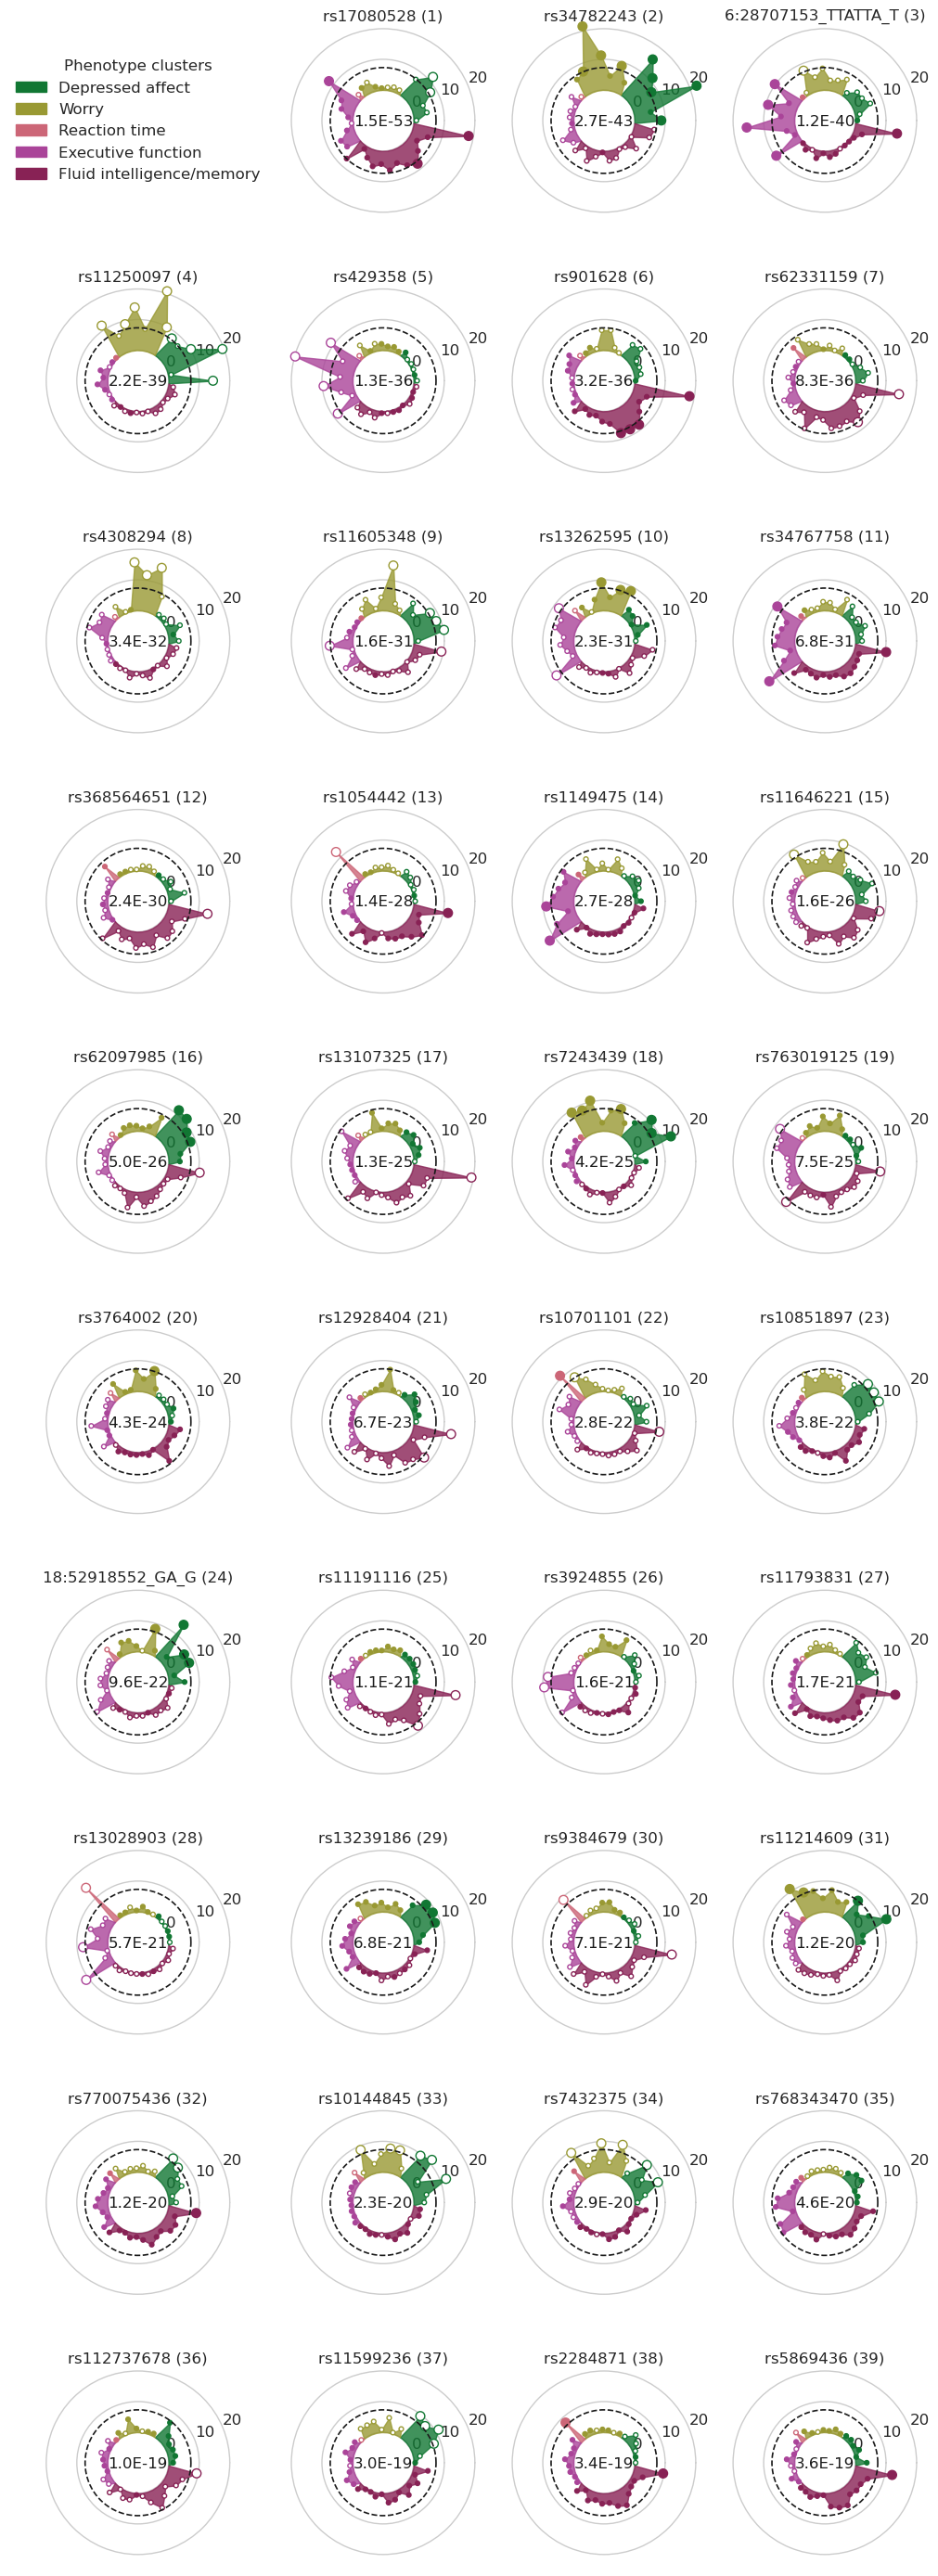

In [30]:
sns.set_style('white')
savefig = True
nrows, ncols = 10, 4
formats = ["png", "svg"]
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/distributed_effects_top{nrows*ncols}_circular_5clusters_directions"

fig, axs = plt.subplots(nrows, ncols, figsize=(10,2.8*nrows), subplot_kw={'projection':"polar"}, constrained_layout=True) # constrained_layout=True

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_names = ["Depressed affect", "Worry", "Reaction time", "Executive function", "Fluid intelligence/memory"]
cluster_colors = ["#117733", "#999933", "#CC6677", "#AA4499", "#882255"]
cluster_sizes = [6, 7, 1, 8, 13]
colors = []
for n, c in zip(cluster_sizes, cluster_colors):
    colors += [c]*n
colors = np.array(colors)

offset = 10
normal_size = 12
gws_size = 4*normal_size
theta, theta_step = np.linspace(0, 2*np.pi, log10pval.shape[1], retstep=True, endpoint=False)
cluster_border_angles = []
for i, s in enumerate(cluster_sizes):
    cluster_border_angles.append( [theta[0+sum(cluster_sizes[:i])], theta[0+sum(cluster_sizes[:i+1])-1]] )
i_snp = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axs[i][j]
        if i > 0 or j > 0:
            r = log10pval[i_snp]
            i_positive = z_mat[i_snp] > 0
            for i_cluster, cluster_size in enumerate(cluster_sizes):
                start_i = sum(cluster_sizes[:i_cluster])
                end_i = start_i + cluster_size
                x = theta[start_i:end_i]
                x = [x[0] - theta_step/2] + list(x) + [x[-1] + theta_step/2]
                y = [offset] + list(r[start_i:end_i] + offset) + [offset]
                ax.fill_between(x, y, offset, alpha=0.8, color=cluster_colors[i_cluster])
            _ = ax.plot(np.linspace(0, 2 * np.pi, 360), [-np.log10(5E-8) + offset]*360, color="k", ls="--", lw=1.2)
            size = np.array([normal_size if rr < -np.log10(5E-8) else gws_size for rr in r])
            # Genome-wide p-values have black outline and larger size
            #edgecolors = [c if s == normal_size else 'k' for c, s in zip(colors,size)]
            colors_direction = [c if i_positive[k] else 'w' for k,c in enumerate(colors)]
            edgecolors = np.array([c for c, s in zip(colors,size)])
            c = ax.scatter(theta, r + offset, c=colors_direction, s=size, marker='o', edgecolors=edgecolors)
            pval = lead_df_plot.PVAL.values[i_snp]
            pval_txt = f"{pval:.1E}"
            #txt = ax.text(0, 0, pval_txt, size=12, ha="center", color="k")
            txt = ax.text(0.5, 0.475, pval_txt, size=12, ha="center", color="k", transform = ax.transAxes)
            rs = df_neur_cog_lead.index[i_snp]
            #ax.set_title(rs, va='bottom', fontsize=12)
            ax.text(0.5, 1, f"{rs} ({i_snp+1})", ha='center', va='center', transform = ax.transAxes, size=12)
            i_snp += 1

            y = np.arange(0,31,10)
            ax.set_yticks(y + offset)
            ax.set_yticklabels(list(map(str,y)))
            ax.set_ylim((0,34))
            ax.spines['polar'].set_visible(False)
            ax.grid(False, axis='x')
            ax.tick_params(labelleft=True, labelright=False, labeltop=False, labelbottom=False, labelsize=12)

# add legend to the first axis
ax = axs[0][0]
ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
legends_handles = []
for name, color, size in zip(cluster_names, cluster_colors, cluster_sizes):
    patch = Patch(color=color, label=name)
    legends_handles.append(patch)
ax.legend(loc='center', handles=legends_handles, fontsize=12, frameon=False,
              title="Phenotype clusters",title_fontsize=12)
            
#plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

In [17]:
np.max(log10pval)

22.346782932713218

# z-score PCA plot

In [ ]:
data_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures"
fname_neur = os.path.join(data_dir, "personality13.most.eig3.all.zscore.csv.gz")
fname_cog = os.path.join(data_dir, "cognition22.most.eig3.all.zscore.csv.gz")
df_neur = pd.read_table(fname_neur, index_col="ID")
df_cog = pd.read_table(fname_cog, index_col="ID")

In [ ]:
df_neur_cog = df_neur.join(df_cog).fillna(0)
df_neur_cog.head()

In [ ]:
# do pca
# see: https://www.jamesloach.com/python/sklearn_pca_to_dataframe.html
from sklearn.decomposition import PCA
n_pca = 2
pca = PCA(n_components=n_pca)
#TODO: try to fit with lead SNP only
df_neur_cog_lead = df_neur_cog.loc[lead_df.LEAD_SNP,:].copy()
pca.fit(df_neur_cog) 

In [ ]:
columns = ['pca_%i' % i for i in range(n_pca)]
df_neur_cog_pca = pd.DataFrame(pca.transform(df_neur_cog_lead), columns=columns, index=df_neur_cog_lead.index)
df_neur_cog_pca.head()

In [ ]:
plt.scatter(df_neur_cog_pca.pca_0, df_neur_cog_pca.pca_1, s=7)

In [3]:
data_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures"
fname_neur = os.path.join(data_dir, "personality13.most.eig3.all.pval.csv.gz")
fname_cog = os.path.join(data_dir, "cognition22.most.eig3.all.pval.csv.gz")
df_neur_p = pd.read_table(fname_neur, index_col="ID")
df_cog_p = pd.read_table(fname_cog, index_col="ID")
df_neur_cog_p = df_neur_p.join(df_cog_p)
df_neur_cog_p.head()

,2020_0_0,2010_0_0,2030_0_0,1990_0_0,1950_0_0,1930_0_0,1970_0_0,2000_0_0,1940_0_0,1960_0_0,...,5012_0_0,23324_2_0_quant,21004_2_0_quant,4282_0_0_quant,5556_0_0,6350_2_0_quant,5790_0_0,6373_2_0_quant,5699_0_0,20016_0_0_quant
ID,,,,,,,,,,,,,,,,,,,,,
rs12238997,0.376672,0.950161,0.858080,0.314944,0.116834,0.756631,0.921157,0.569657,0.477660,0.881930,...,0.506962,0.786639,0.351010,0.228279,0.767686,0.007749,0.546026,0.672765,0.487524,0.631890
rs144155419,0.287322,0.356922,0.520168,0.893283,0.426084,0.592242,0.724597,0.572082,0.520129,0.683885,...,0.792008,0.959841,0.950934,0.097091,0.435944,0.292850,0.819303,0.435468,0.689539,0.461228
rs189787166,0.599462,0.364039,0.852217,0.762112,0.410755,0.290353,0.876682,0.734500,0.969920,0.863039,...,0.679455,0.702542,0.347491,0.772085,0.530495,0.780680,0.940880,0.633022,0.445822,0.497748
rs148120343,0.253173,0.954451,0.378416,0.030860,0.201397,0.364708,0.576161,0.735207,0.226722,0.246675,...,0.847730,0.499065,0.290236,0.212417,0.805452,0.040637,0.293620,0.980402,0.517571,0.603929
rs58276399,0.283221,0.564387,0.747494,0.091532,0.140277,0.822388,0.975739,0.831965,0.627708,0.636219,...,0.156746,0.613529,0.127004,0.725054,0.526892,0.025054,0.199272,0.583365,0.424462,0.628694


In [19]:
neur_mean_p = (-np.log10(df_neur_p)).max(axis=1)
cog_mean_p = (-np.log10(df_cog_p)).max(axis=1)
i_lead = df_neur_p.index.isin(lead_df.LEAD_SNP)

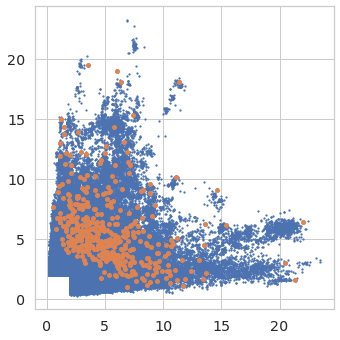

In [20]:
sns.set_style('whitegrid')

i2plot = (neur_mean_p>2) | (cog_mean_p>2)

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(neur_mean_p[i2plot], cog_mean_p[i2plot], s=1.5, c="C0")
ax.scatter(neur_mean_p[i_lead], cog_mean_p[i_lead], s=16, c="C1")
plt.tight_layout()
plt.show()

In [ ]:
_=plt.hist(neur_mean_p/cog_mean_p, 200, density=True)
plt.xlim((0,2))

In [ ]:
ss.norm.ppf(5E-8)

In [64]:
a = np.array([[1,2],[3,4]])
a*a

array([[ 1,  4],
       [ 9, 16]])

In [51]:
theta.shape

(36,)

In [64]:
# MAGMA plots
genes_df = pd.DataFrame(columns=["GENE", "P", "CLUSTER", "FID"])
magma_dir = "/cluster/projects/p33/users/alexeas/most_mental/new_start/magma/gene_analysis"

top_n = 50
top_nn = 500

top_n_dict = {}
top_nn_dict = {}
n_significant_genes = {}

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence
clusters = [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5]

do_correction = True
correction_type = 'bonferroni' # fdr bonferroni

for de in os.scandir(magma_dir):
    if de.name.endswith("genes.out"):
        print(f"Processing {de.name}")
        fid = de.name.split('.')[0]
        df = pd.read_csv(de.path, delim_whitespace=True, usecols=["GENE", "P"])
        df.sort_values(by="P", inplace=True)
        top_n_dict[fid] = set(df.head(top_n).GENE)
        top_nn_dict[fid] = set(df.head(top_nn).GENE)
        if do_correction:
            if correction_type == 'bonferroni':
                p_thresh = 0.05/len(df)
                df = df[df.P<p_thresh]
                n_significant_genes[fid] = df.shape[0]
            else:
                raise Exception(f"{correction_type} correction is not implemented")
        for i, c in enumerate(clusters):
            if fid in c:
                df["CLUSTER"] = i
                df["FID"] = fid
                break
        else:
            raise Exception(f"No custer for {fid}")
        genes_df = genes_df.append(df, ignore_index=True)
print(genes_df.head())

Processing 1940_0_0.genes.out
Processing 1950_0_0.genes.out
Processing 21004_2_0_quant.genes.out
Processing 399_0_2_quant.genes.out
Processing 4990_0_0.genes.out
Processing 2030_0_0.genes.out
Processing 1920_0_0.genes.out
Processing 23324_2_0_quant.genes.out
Processing 5790_0_0.genes.out
Processing 5556_0_0.genes.out
Processing 1970_0_0.genes.out
Processing 20127_0_0_quant.genes.out
Processing 1930_0_0.genes.out
Processing 5699_0_0.genes.out
Processing 4294_0_0.genes.out
Processing 6348_2_0_quant.genes.out
Processing 2020_0_0.genes.out
Processing 20023_0_0_quant.genes.out
Processing 2010_0_0.genes.out
Processing 1990_0_0.genes.out
Processing 5012_0_0.genes.out
Processing 4968_0_0.genes.out
Processing 1960_0_0.genes.out
Processing 4979_0_0.genes.out
Processing 2000_0_0.genes.out
Processing 6373_2_0_quant.genes.out
Processing 4957_0_0.genes.out
Processing 6350_2_0_quant.genes.out
Processing 4282_0_0_quant.genes.out
Processing 400_0_2_quant.genes.out
Processing 1980_0_0.genes.out
Processi

In [69]:
gene_cluster_df = genes_df[["GENE","CLUSTER"]]
print(gene_cluster_df.shape)
gene_cluster_df.head()

(1404, 2)


,GENE,CLUSTER
0,286046,0
1,4482,0
2,9258,0
3,83648,0
4,640,0


In [70]:
cluster_count = gene_cluster_df.groupby("CLUSTER").agg(ngenes = ('GENE' , 'count'),
                                                    geneids = ('GENE' ,  'unique'))
#cluster_count["ngenes"] = [len(ids) for ids in cluster_count.geneids]
cluster_count

,ngenes,geneids
CLUSTER,,
0,436,"[286046, 4482, 9258, 83648, 640, 94137, 2626, ..."
1,372,"[246744, 162540, 4905, 284058, 2918, 4137, 984..."
2,107,"[23109, 79797, 9776, 6311, 10019, 8525, 55626,..."
3,177,"[83989, 79001, 50863, 2903, 84148, 56899, 8459..."
4,312,"[63891, 389118, 10293, 9807, 7318, 4486, 275, ..."


In [67]:
overlap_mat = np.zeros((len(trait_order), len(trait_order)), dtype=int)
top_mat = np.zeros((len(trait_order), len(trait_order)), dtype=float)
top_mat_labels = np.empty(shape=(len(trait_order), len(trait_order)), dtype='S10')
for i1, t1 in enumerate(trait_order):
    for i2, t2 in enumerate(trait_order):
        if (t1 in cluster_count.index) and (t2 in cluster_count.index):
            n = len(set(cluster_count.geneids[t1]) & set(cluster_count.geneids[t2]))
            if i1 < i2:
                top_mat[i1,i2] = len(top_n_dict[t1] & top_n_dict[t2])/top_n
                #top_mat_labels[i1,i2] = ""
            elif i1 > i2:
                top_mat[i1,i2] = len(top_nn_dict[t1] & top_nn_dict[t2])/top_nn
                #top_mat_labels[i1,i2] = ""
            else:
                # i1 == i2
                top_mat[i1,i2] = 1.
                top_mat_labels[i1,i2] = str(n_significant_genes[t1])
        else:
            n = 0
        overlap_mat[i1,i2] = n

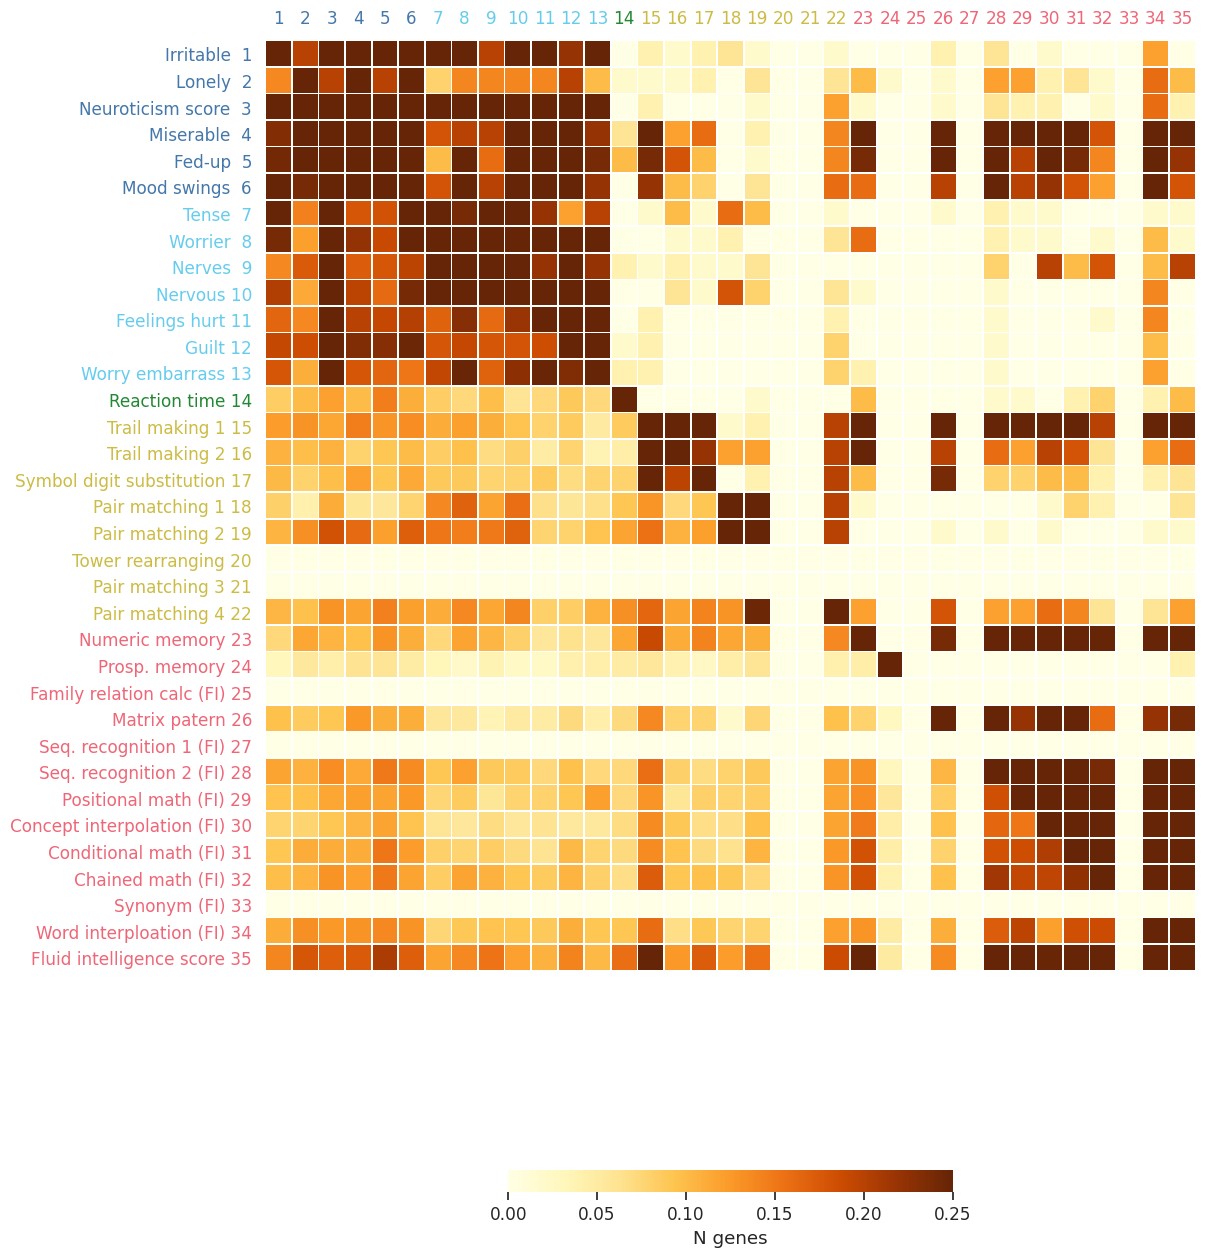

In [68]:
# gene overlap
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/magma_gnene_overlap"
formats = ['png', 'svg']
savefig = False

sns.set(font_scale=1.1) 

fig, ax = plt.subplots(1,1,figsize=(14,14))

YlOrBr_colors = ['#FFFFE5', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29', '#EC7014', '#CC4C02', '#993404', '#662506']
YlOrBr_cmap = LinearSegmentedColormap.from_list("ylorbr", YlOrBr_colors)

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
# snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
mask = None # -np.abs(z_mat) > nominal_threshold # 
sns.heatmap(top_mat, vmin=0, vmax=.25, square=True, linewidths=.5,
            center=None, cmap=YlOrBr_cmap, cbar_kws={"shrink": .35, 'label': "N genes", "orientation": "horizontal"},
            ax=ax, mask=mask)

ax.set_yticks(np.arange(overlap_mat.shape[0]) + 0.5)
yticklabels = [f"{id_var_dict[t]} {i+1:2d}" for i, t in enumerate(trait_order)]
_ = ax.set_yticklabels(yticklabels, rotation=0)
ax.set_xticks(np.arange(overlap_mat.shape[0]) + 0.5)
ax.set_xticklabels([f"{i+1}" for i in range(len(trait_order))])


#cbar_ax = fig.get_axes()[1]
#cbar_ticks = cbar_ax.get_yticks()
#abs_cbar_ticklabels = map(str, map(abs, cbar_ticks))
#cbar_ax.set_yticklabels(abs_cbar_ticklabels)

ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)

# 5 clusters
# [4 4 4 4 4 4 1 1 1 1 1 1 1 2 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"

for trait, tly, tlx in zip(trait_order, ax.get_yticklabels(),ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tly.set_color(cluster_1_color)
        tlx.set_color(cluster_1_color)
    elif trait in cluster_2:
        tly.set_color(cluster_2_color)
        tlx.set_color(cluster_2_color)
    elif trait in cluster_3:
        tly.set_color(cluster_3_color)
        tlx.set_color(cluster_3_color)
    elif trait in cluster_4:
        tly.set_color(cluster_4_color)
        tlx.set_color(cluster_4_color)
    else:
        tly.set_color(cluster_5_color)
        tlx.set_color(cluster_5_color)

plt.tight_layout()

if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

In [100]:
# cluster overlap
overlap_fraction = np.zeros((cluster_count.shape[0], cluster_count.shape[0]), dtype=float)
overlap_label = np.empty(shape=overlap_fraction.shape, dtype="U8")
for i in range(cluster_count.shape[0]):
    for j in range(cluster_count.shape[0]):
        si = set(cluster_count.geneids[i])
        sj = set(cluster_count.geneids[j])
        ni = len(si)
        nj = len(sj)
        n_min = min(ni, nj)
        nij = len(si & sj)
        overlap_fraction[i,j] = 100*nij/n_min
        if i >= j:
            overlap_label[i,j] = str(nij)
        if i < j:
            overlap_label[i,j] = f"{100*nij/n_min:.1f}%"
            
print(overlap_fraction)
overlap_label

[[100.          50.25125628  12.14953271  29.78723404  20.28301887]
 [ 50.25125628 100.           3.73831776  14.18439716  19.59798995]
 [ 12.14953271   3.73831776 100.           1.86915888  12.14953271]
 [ 29.78723404  14.18439716   1.86915888 100.          27.65957447]
 [ 20.28301887  19.59798995  12.14953271  27.65957447 100.        ]]


array([['220', '50.3%', '12.1%', '29.8%', '20.3%'],
       ['100', '199', '3.7%', '14.2%', '19.6%'],
       ['13', '4', '107', '1.9%', '12.1%'],
       ['42', '20', '2', '141', '27.7%'],
       ['43', '39', '13', '39', '212']], dtype='<U8')

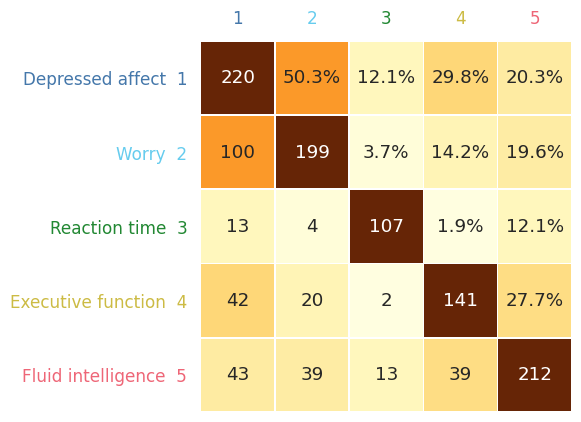

In [106]:
# gene overlap
outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/magma_gnene_cluster_overlap"
formats = ['png', 'svg']
savefig = True

sns.set(font_scale=1.1) 

fig, ax = plt.subplots(1,1,figsize=(6,6))

YlOrBr_colors = ['#FFFFE5', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29', '#EC7014', '#CC4C02', '#993404', '#662506']
YlOrBr_cmap = LinearSegmentedColormap.from_list("ylorbr", YlOrBr_colors)

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
# snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
mask = None # -np.abs(z_mat) > nominal_threshold # 
sns.heatmap(overlap_fraction, vmin=0, vmax=100, square=True, linewidths=.5,
            center=None, cmap=YlOrBr_cmap, cbar=False,
            ax=ax, mask=mask, annot=overlap_label, fmt="")
#cbar_kws={"shrink": .4, 'label': "Percent of overlapping genes", "orientation": "vertical"}

cluster_labels = ["Depressed affect", "Worry", "Reaction time", "Executive function", "Fluid intelligence"]
ax.set_yticks(np.arange(overlap_fraction.shape[0]) + 0.5)
yticklabels = [f"{t} {i+1:2d}" for i, t in enumerate(cluster_labels)]
_ = ax.set_yticklabels(yticklabels, rotation=0)
ax.set_xticks(np.arange(overlap_fraction.shape[0]) + 0.5)
ax.set_xticklabels([f"{i+1}" for i in range(len(cluster_labels))])


#cbar_ax = fig.get_axes()[1]
#cbar_ticks = cbar_ax.get_yticks()
#abs_cbar_ticklabels = map(str, map(abs, cbar_ticks))
#cbar_ax.set_yticklabels(abs_cbar_ticklabels)

ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)

# 5 clusters
# [4 4 4 4 4 4 1 1 1 1 1 1 1 2 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0]

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"
cluster_colors = [cluster_1_color, cluster_2_color, cluster_3_color, cluster_4_color, cluster_5_color]

for color, tly, tlx in zip(cluster_colors, ax.get_yticklabels(),ax.get_xticklabels()):
    tly.set_color(color)
    tlx.set_color(color)
    
plt.tight_layout()

if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

In [10]:
#Overlaping loci
univariate_loci = {"1920_0_0":36, "1930_0_0":32, "1940_0_0":28, "1950_0_0":24, "1960_0_0":38, "1970_0_0":33,
                   "1980_0_0":37, "1990_0_0":16, "2000_0_0":23, "20016_0_0_quant":92, "20023_0_0_quant":50,
                   "2010_0_0":10, "20127_0_0_quant":82, "2020_0_0":6, "2030_0_0":19, "23324_2_0_quant":5,
                   "399_0_1":1, "399_0_2_quant":15, "400_0_1_quant":18, "400_0_2_quant":40, "4282_0_0_quant":17,
                   "4294_0_0":2, "4957_0_0":5, "4968_0_0":4, "4990_0_0":6, "5012_0_0":4, "5556_0_0":2, "5699_0_0":2,
                   "6350_2_0_quant":8}
overlaping_loci = {"1920_0_0":31,"1930_0_0":27,"1940_0_0":20,"1950_0_0":18,"1960_0_0":33,"1970_0_0":22,
                   "1980_0_0":32,"1990_0_0":15,"2000_0_0":17,"20016_0_0_quant":75,"20023_0_0_quant":30,
                   "2010_0_0":8,"20127_0_0_quant":74,"2020_0_0":6,"2030_0_0":19,"23324_2_0_quant":4,"399_0_1":1,
                   "399_0_2_quant":13,"400_0_1_quant":15,"400_0_2_quant":30,"4282_0_0_quant":12,"4294_0_0":0,
                   "4957_0_0":4,"4968_0_0":2,"4990_0_0":5,"5012_0_0":3,"5556_0_0":2,"5699_0_0":0,"6350_2_0_quant":7}
assert set(univariate_loci.keys()) == set(overlaping_loci.keys())

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence
clusters = [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5]

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"
cluster_colors = [cluster_1_color, cluster_2_color, cluster_3_color, cluster_4_color, cluster_5_color]

n_loci = np.array([univariate_loci.get(t,0) for t in trait_order])
n_loci_overlap = np.array([overlaping_loci.get(t,0) for t in trait_order])

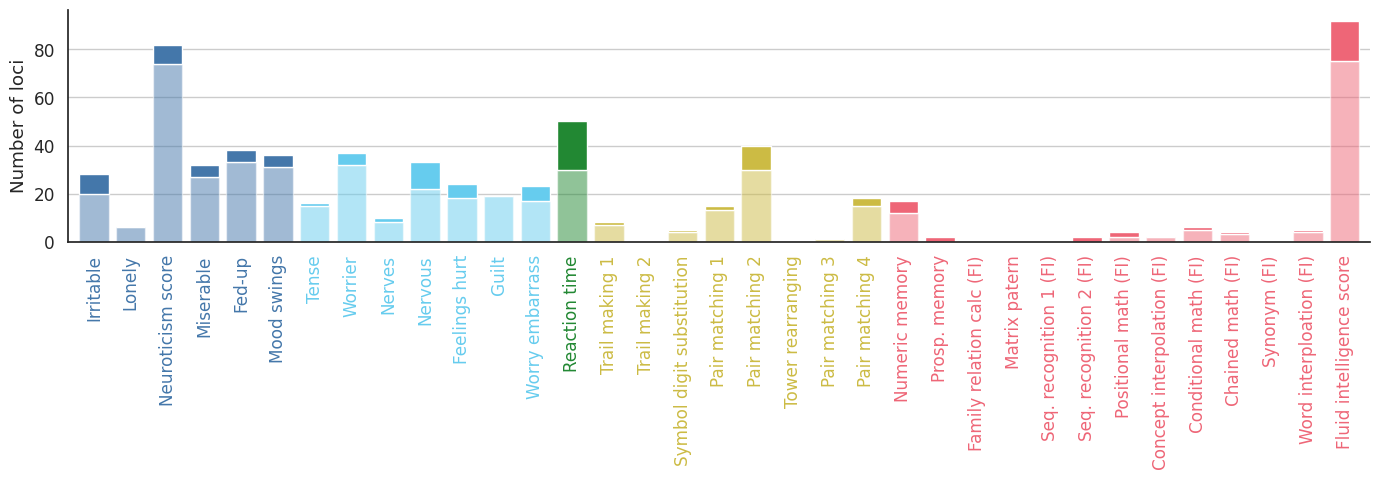

In [15]:
# plot h2, number of loci and sample size
matplotlib.rc_file_defaults()
#sns.color_palette("tab10")
sns.set(font_scale=1.1)
sns.set_style(style='white')

outf = f"/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/overlapping_loci"
formats = ['png', 'svg']
savefig = True

fig, ax = plt.subplots(1,1,figsize=(14,5))
x_pos_all = np.arange(len(trait_order))

#ax1.set_title(f"Univariate GWAS of {len(trait_order)} {group} traits")
for i, cl in enumerate(clusters):
    i_start = sum(map(len, clusters[:i]))
    i_end = i_start + len(cl)
    x_pos = x_pos_all[i_start:i_end]
    
    ax.bar(x_pos, n_loci_overlap[i_start:i_end], align='center', color=cluster_colors[i], edgecolor=None, alpha=0.5)
    ax.bar(x_pos, n_loci[i_start:i_end]-n_loci_overlap[i_start:i_end], align='center', color=cluster_colors[i],
           bottom=n_loci_overlap[i_start:i_end], edgecolor=None)

ax.set_xticks(x_pos_all)
ax.set_ylabel('Number of loci')
ax.grid(axis='y')
x_tick_labels = [id_var_dict[t] for t in trait_order]
ax.set_xticklabels(x_tick_labels, rotation=90)
ax.set_xlim((x_pos_all[0]-0.7,x_pos_all[-1]+0.7))


for trait, tlx in zip(trait_order, ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tlx.set_color(cluster_1_color)
    elif trait in cluster_2:
        tlx.set_color(cluster_2_color)
    elif trait in cluster_3:
        tlx.set_color(cluster_3_color)
    elif trait in cluster_4:
        tlx.set_color(cluster_4_color)
    else:
        tlx.set_color(cluster_5_color)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

In [6]:
df_neur_cog_lead.head()

,1940_0_0,2020_0_0,20127_0_0_quant,1930_0_0,1960_0_0,1920_0_0,1990_0_0,1980_0_0,2010_0_0,1970_0_0,...,6373_2_0_quant,5790_0_0,5699_0_0,4968_0_0,5556_0_0,4990_0_0,5012_0_0,5001_0_0,4957_0_0,20016_0_0_quant
ID,,,,,,,,,,,,,,,,,,,,,
rs17080528,-1.12902,-4.014320,-3.657640,-5.580820,-6.92035,-5.25762,-1.57572,-1.78252,-1.15200,0.640611,...,4.46396,-3.875190,-4.952920,-4.079350,-5.036030,-5.637900,-4.331020,-3.021640,-4.550030,8.86097
rs34782243,5.89758,4.522450,9.822590,5.630660,6.72382,8.09467,3.72568,5.90773,4.10989,6.803050,...,-2.43694,-0.366056,3.286390,3.007110,0.738897,1.464020,3.711600,0.367266,4.668380,-5.06482
6:28707153_TTATTA_T,0.71870,-1.931660,-4.684320,-3.798710,-3.73442,-1.90186,-4.36497,-3.59790,-3.23324,-5.215750,...,2.85712,-0.928067,-2.405460,-1.827310,0.458101,-0.425112,-0.494724,-1.351100,-3.054270,7.64250
rs11250097,-7.80069,-1.289880,-9.131240,-6.408160,-5.28315,-5.48967,-6.30629,-9.44934,-5.22851,-7.649540,...,1.11312,0.233855,1.027790,0.571247,2.400910,2.232090,1.028400,1.657880,3.013090,-2.05904
rs429358,-1.44062,0.383464,-0.606516,-0.872388,-0.49992,2.16787,1.00150,1.98336,1.67450,2.378550,...,-2.64632,-0.709466,0.876688,-0.922836,-1.222760,-0.074886,1.890840,-1.286860,-0.471966,-1.40908


In [7]:
df_neur_cog_lead.to_csv("/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/effect_directions/lead_snp_univariate_z.csv", index=True, sep='\t')

# Clustering of lead variants

In [3]:
data_dir = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/data4figures"
fname_neur = os.path.join(data_dir, "personality13.most.eig3.all.zscore.csv.gz")
fname_cog = os.path.join(data_dir, "cognition22.most.eig3.all.zscore.csv.gz")
df_neur = pd.read_table(fname_neur, index_col="ID")
df_cog = pd.read_table(fname_cog, index_col="ID")
df_neur_cog = df_neur.join(df_cog) #.fillna(0)

lead_snps_file = "/cluster/p/p33/cluster/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/clump/personality13_cognition22_eig3.most.orig.loci.csv"
lead_df = pd.read_table(lead_snps_file)
lead_df.sort_values(by="PVAL",inplace=True)

In [4]:
N=431
lead_df_plot = lead_df.head(N).copy()
df_neur_cog_lead = df_neur_cog.loc[lead_df_plot.LEAD_SNP,:].copy()
# trait_order is taken from rg-bsed clustering
trait_order = ['1940_0_0', '2020_0_0', '20127_0_0_quant', '1930_0_0', '1960_0_0', '1920_0_0', '1990_0_0', '1980_0_0', '2010_0_0', '1970_0_0', '1950_0_0', '2030_0_0', '2000_0_0', '20023_0_0_quant', '6350_2_0_quant', '6348_2_0_quant', '23324_2_0_quant', '399_0_2_quant', '400_0_2_quant', '21004_2_0_quant', '399_0_1', '400_0_1_quant', '4282_0_0_quant', '4294_0_0', '4979_0_0', '6373_2_0_quant', '5790_0_0', '5699_0_0', '4968_0_0', '5556_0_0', '4990_0_0', '5012_0_0', '5001_0_0', '4957_0_0', '20016_0_0_quant'] # list(id_var_dict)
swap_sign = '399_0_1 4294_0_0 4979_0_0 5001_0_0 399_0_2_quant 4968_0_0 400_0_1_quant 4957_0_0 400_0_2_quant 4990_0_0 20023_0_0_quant 5012_0_0 5556_0_0 5790_0_0 5699_0_0 6348_2_0_quant 6350_2_0_quant'.split()
df_neur_cog_lead = df_neur_cog_lead[trait_order]
df_neur_cog_lead.loc[:,swap_sign] *= -1
z_mat = df_neur_cog_lead.values.copy()
print(z_mat.shape)

(431, 35)


In [5]:
corr_mat = np.corrcoef(z_mat)
corr_mat2 = corr_mat**2
dist_mat_directed = 1 - corr_mat
dist_mat_undirected = 1 - np.abs(corr_mat)
dist_mat_undirected2 = 1 - corr_mat2

[6 3 6 6 3 6 3 6 2 3 6 3 6 6 4 3 3 3 3 3 3 3 6 3 3 3 6 3 3 3 3 6 6 6 6 3 6
 6 6 3 3 6 6 6 2 6 3 6 3 3 3 3 3 1 2 6 3 3 3 3 6 3 3 3 4 3 3 6 6 3 6 3 6 3
 6 3 3 6 3 6 3 3 3 5 3 3 3 6 3 3 6 6 2 6 6 3 3 6 3 3 3 6 3 3 3 6 4 6 2 6 6
 3 3 5 1 3 6 4 6 3 3 3 3 3 6 4 6 6 3 6 3 6 6 3 6 6 6 0 3 3 6 6 6 3 3 3 6 6
 3 3 3 6 6 6 3 3 6 6 3 3 3 3 3 3 4 3 1 6 3 6 3 3 6 4 3 3 6 3 6 3 0 6 3 3 3
 1 6 3 3 3 1 3 6 3 3 6 3 3 6 4 4 6 1 3 6 3 6 1 3 1 3 3 3 3 3 3 4 3 6 3 6 6
 6 3 3 3 6 6 3 6 6 3 3 3 6 6 6 3 6 6 6 3 3 1 0 6 6 4 3 3 3 6 1 6 2 6 3 1 6
 6 2 6 4 3 3 1 6 6 4 3 0 3 3 6 6 6 3 6 6 6 6 3 2 3 2 3 3 3 3 3 6 4 6 3 6 6
 6 3 6 2 6 6 4 6 6 3 3 6 4 2 0 6 3 6 3 6 5 3 6 6 4 3 6 6 6 6 3 3 4 2 2 3 6
 0 3 4 6 4 3 3 3 1 3 3 6 3 6 6 3 2 3 3 3 1 5 3 3 6 3 6 6 3 6 3 3 6 6 3 3 6
 6 3 6 1 3 1 3 6 6 3 3 3 4 2 4 3 3 3 3 3 3 3 3 4 3 4 6 6 6 6 1 0 4 6 3 3 3
 4 3 6 6 6 6 6 2 3 3 3 6 3 6 6 6 6 3 3 3 6 3 1 6]


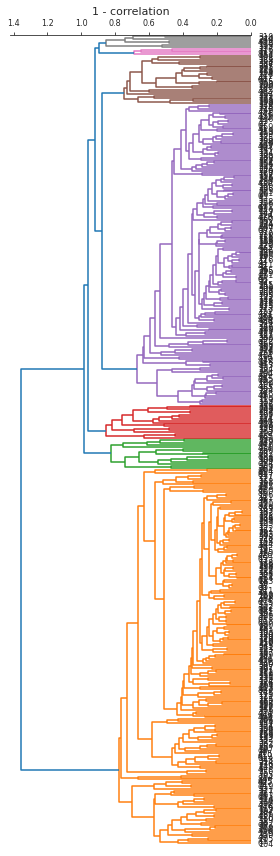

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    res = dendrogram(linkage_matrix, **kwargs)
    #print(res['leaves_color_list'])
    
# distmat = 1 - np.abs(rg_mat)
model = AgglomerativeClustering(n_clusters=7,linkage='average',affinity='precomputed',compute_distances=True)
model = model.fit(dist_mat_directed)

print(model.labels_)

sns.set_style(style='ticks')
savefig = False
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/lead_z_score_clustering_directed"
formats = ['png', 'svg']
fig, ax = plt.subplots(1, 1, figsize=(4, 12))
labels = [str(i) for i in range(z_mat.shape[0])]
#truncate_mode='lastp'
plot_dendrogram(model,color_threshold=0.87,truncate_mode=None,orientation='left',labels=None,ax=ax)
ax.set_xlabel('1 - correlation', fontsize=11)
color_neur = '#1f77b4'
color_cognition = '#ff7f0e'
clustered_snp_order = []
for tlx in ax.get_yticklabels():
    snp_i = int(tlx.get_text())
    clustered_snp_order.append(snp_i)
#y_tick_pos = range(0,z_mat.shape[0],10)
#y_tick_labels = [str(clustered_snp_order[i]) for i in y_tick_pos]
#ax.set_yticks(y_tick_pos)
#ax.set_yticklabels(y_tick_labels)

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.tick_params(axis='both', labelsize=8)
#ax.tick_params(axis='x', rotation=90)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()
#print(clustered_snp_order)

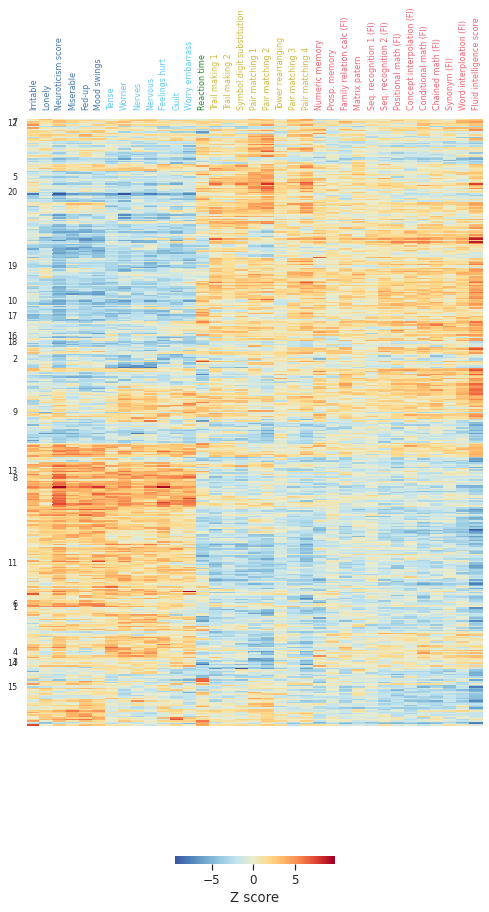

In [7]:
z_mat_reordered = z_mat[clustered_snp_order[::-1]]
sns.set(font_scale=1.1) 

savefig = True
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/lead_z_score_clustering_directed_heatmap"
formats = ['png', 'svg']

fig, ax = plt.subplots(1,1,figsize=(7,14))

sunset_colors = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF', '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D', '#A50026']
sunset_cmap = LinearSegmentedColormap.from_list("sunset", sunset_colors)

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
#snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
# snp_labels = [str(snp) if i%10==0 else " " for i,snp in enumerate(clustered_snp_order)]
snp_labels = [str(snp+1) if snp<20 else " " for i,snp in enumerate(clustered_snp_order)]
mask = None # -np.abs(z_mat) > nominal_threshold # 
sns.heatmap(z_mat_reordered, square=False, linewidths=0,
            center=0, cmap=sunset_cmap, cbar_kws={"shrink": .35, 'label': "Z score", "orientation": "horizontal"},
            ax=ax, mask=mask, xticklabels=trait_labels, yticklabels=snp_labels)
#cbar_ax = fig.get_axes()[1]
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, rotation=0)

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"

for trait, tly, tlx in zip(trait_order, ax.get_yticklabels(),ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tlx.set_color(cluster_1_color)
    elif trait in cluster_2:
        tlx.set_color(cluster_2_color)
    elif trait in cluster_3:
        tlx.set_color(cluster_3_color)
    elif trait in cluster_4:
        tlx.set_color(cluster_4_color)
    else:
        tlx.set_color(cluster_5_color)

ax.tick_params(axis='x', rotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()

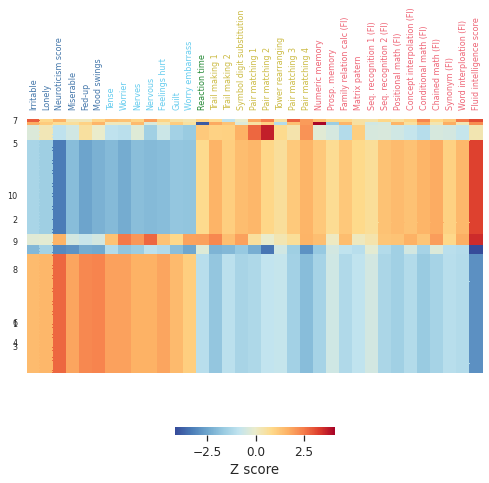

In [8]:
savefig = True
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/lead_z_score_clustering_directed_heatmap_cluster_median"
formats = ['png', 'svg']

z_mat_median = np.zeros_like(z_mat)
cluster_order = []
for snp_i in clustered_snp_order[::-1]:
    cluster_i = model.labels_[snp_i]
    if not cluster_i in cluster_order:
        cluster_order.append(cluster_i)

cluster_size_dict = Counter(model.labels_)

i_start = 0
for c in cluster_order:
    c_size = cluster_size_dict[c]
    c_i = model.labels_ == c
    z_mat_median[i_start:i_start+c_size] = np.median(z_mat[c_i], axis=0)
    #z_mat_median[i_start:i_start+c_size] = np.max(np.abs(z_mat[c_i]), axis=0)
    i_start += c_size
    
#nominal_sig_z_thresh = -ss.norm.ppf(5E-2)
#z_mat_median[z_mat_median>nominal_sig_z_thresh] = nominal_sig_z_thresh
#z_mat_median[z_mat_median<-nominal_sig_z_thresh] = -nominal_sig_z_thresh
#z_mat_median = z_mat_median[::-1]

fig, ax = plt.subplots(1,1,figsize=(7,7))

sunset_colors = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF', '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D', '#A50026']
sunset_cmap = LinearSegmentedColormap.from_list("sunset", sunset_colors)

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
#snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
# snp_labels = [str(snp) if i%10==0 else " " for i,snp in enumerate(clustered_snp_order)]
snp_labels = [str(snp+1) if snp<10 else " " for i,snp in enumerate(clustered_snp_order)]
mask = None # -np.abs(z_mat) > nominal_threshold # 
sns.heatmap(z_mat_median, square=False, linewidths=0,
            center=0, cmap=sunset_cmap, cbar_kws={"shrink": .35, 'label': "Z score", "orientation": "horizontal"},
            ax=ax, mask=mask, xticklabels=trait_labels, yticklabels=snp_labels)
#cbar_ax = fig.get_axes()[1]
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, rotation=0)

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"

for trait, tly, tlx in zip(trait_order, ax.get_yticklabels(),ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tlx.set_color(cluster_1_color)
    elif trait in cluster_2:
        tlx.set_color(cluster_2_color)
    elif trait in cluster_3:
        tlx.set_color(cluster_3_color)
    elif trait in cluster_4:
        tlx.set_color(cluster_4_color)
    else:
        tlx.set_color(cluster_5_color)

ax.tick_params(axis='x', rotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()


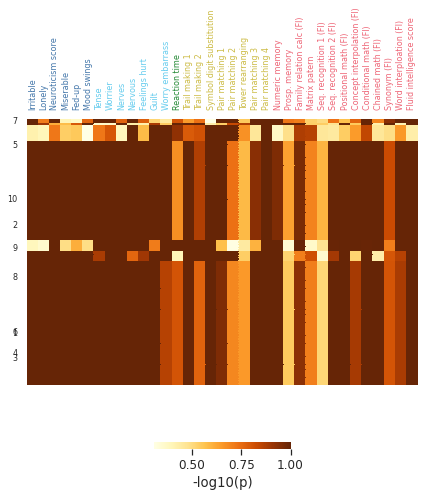

In [93]:
z_mat_median = np.zeros_like(z_mat)
cluster_order = []
for snp_i in clustered_snp_order[::-1]:
    cluster_i = model.labels_[snp_i]
    if not cluster_i in cluster_order:
        cluster_order.append(cluster_i)

cluster_size_dict = Counter(model.labels_)

i_start = 0
for c in cluster_order:
    c_size = cluster_size_dict[c]
    c_i = model.labels_ == c
    z_mat_median[i_start:i_start+c_size] = np.median(z_mat[c_i], axis=0)
    i_start += c_size

p_mat_median = -np.log10(ss.norm.sf(np.abs(z_mat_median)))
i_sig = p_mat_median > -np.log10(1E-1)
p_mat_median[i_sig] = -np.log10(1E-1)

fig, ax = plt.subplots(1,1,figsize=(7,7))

YlOrBr_colors = ['#FFFFE5', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29', '#EC7014', '#CC4C02', '#993404', '#662506']
YlOrBr_cmap = LinearSegmentedColormap.from_list("ylorbr", YlOrBr_colors)
sunset_colors = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF', '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D', '#A50026']
sunset_cmap = LinearSegmentedColormap.from_list("sunset", sunset_colors)

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
#snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
# snp_labels = [str(snp) if i%10==0 else " " for i,snp in enumerate(clustered_snp_order)]
snp_labels = [str(snp+1) if snp<10 else " " for i,snp in enumerate(clustered_snp_order)]
mask = None # -np.abs(z_mat) > nominal_threshold # 
sns.heatmap(p_mat_median, square=False, linewidths=0,
            center=None, cmap=YlOrBr_cmap, cbar_kws={"shrink": .35, 'label': "-log10(p)", "orientation": "horizontal"},
            ax=ax, mask=mask, xticklabels=trait_labels, yticklabels=snp_labels)
#cbar_ax = fig.get_axes()[1]
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, rotation=0)

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"

for trait, tly, tlx in zip(trait_order, ax.get_yticklabels(),ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tlx.set_color(cluster_1_color)
    elif trait in cluster_2:
        tlx.set_color(cluster_2_color)
    elif trait in cluster_3:
        tlx.set_color(cluster_3_color)
    elif trait in cluster_4:
        tlx.set_color(cluster_4_color)
    else:
        tlx.set_color(cluster_5_color)

ax.tick_params(axis='x', rotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=8)


In [12]:
model.labels_

array([6, 3, 6, 6, 3, 6, 3, 6, 2, 3, 6, 3, 6, 6, 4, 3, 3, 3, 3, 3, 3, 3,
       6, 3, 3, 3, 6, 3, 3, 3, 3, 6, 6, 6, 6, 3, 6, 6, 6, 3, 3, 6, 6, 6,
       2, 6, 3, 6, 3, 3, 3, 3, 3, 1, 2, 6, 3, 3, 3, 3, 6, 3, 3, 3, 4, 3,
       3, 6, 6, 3, 6, 3, 6, 3, 6, 3, 3, 6, 3, 6, 3, 3, 3, 5, 3, 3, 3, 6,
       3, 3, 6, 6, 2, 6, 6, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 6, 4, 6, 2, 6,
       6, 3, 3, 5, 1, 3, 6, 4, 6, 3, 3, 3, 3, 3, 6, 4, 6, 6, 3, 6, 3, 6,
       6, 3, 6, 6, 6, 0, 3, 3, 6, 6, 6, 3, 3, 3, 6, 6, 3, 3, 3, 6, 6, 6,
       3, 3, 6, 6, 3, 3, 3, 3, 3, 3, 4, 3, 1, 6, 3, 6, 3, 3, 6, 4, 3, 3,
       6, 3, 6, 3, 0, 6, 3, 3, 3, 1, 6, 3, 3, 3, 1, 3, 6, 3, 3, 6, 3, 3,
       6, 4, 4, 6, 1, 3, 6, 3, 6, 1, 3, 1, 3, 3, 3, 3, 3, 3, 4, 3, 6, 3,
       6, 6, 6, 3, 3, 3, 6, 6, 3, 6, 6, 3, 3, 3, 6, 6, 6, 3, 6, 6, 6, 3,
       3, 1, 0, 6, 6, 4, 3, 3, 3, 6, 1, 6, 2, 6, 3, 1, 6, 6, 2, 6, 4, 3,
       3, 1, 6, 6, 4, 3, 0, 3, 3, 6, 6, 6, 3, 6, 6, 6, 6, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 6, 4, 6, 3, 6, 6, 6, 3, 6, 2, 6,

In [96]:
ss.norm.ppf(5E-2)

-1.6448536269514729

# Directionless clustering

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


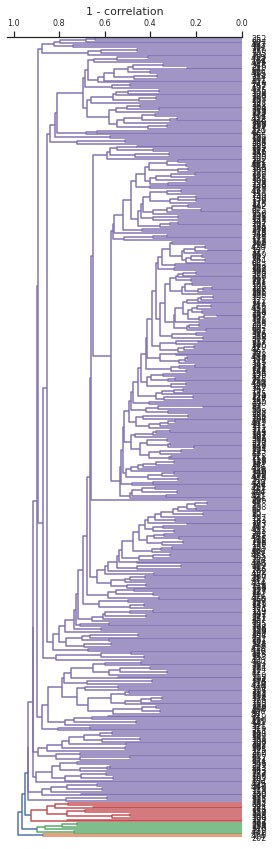

In [68]:
dist_mat_undirected = 1 - np.abs(corr_mat)
dist_mat_undirected2 = 1 - corr_mat2

model = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed',compute_distances=True)
model = model.fit(dist_mat_undirected2)

print(model.labels_)

sns.set_style(style='ticks')
savefig = False
outf = "/cluster/projects/p33/users/alexeas/most_mental/new_start/mostest/results/personality13_cognition22/figures/custom/lead_z_score_clustering_directed"
formats = ['png', 'svg']
fig, ax = plt.subplots(1, 1, figsize=(4, 12))
labels = [str(i) for i in range(z_mat.shape[0])]
#truncate_mode='lastp'
plot_dendrogram(model,color_threshold=0.95,truncate_mode=None,orientation='left',labels=None,ax=ax)
ax.set_xlabel('1 - correlation', fontsize=11)
color_neur = '#1f77b4'
color_cognition = '#ff7f0e'
clustered_snp_order = []
for tlx in ax.get_yticklabels():
    snp_i = int(tlx.get_text())
    clustered_snp_order.append(snp_i)
#y_tick_pos = range(0,z_mat.shape[0],10)
#y_tick_labels = [str(clustered_snp_order[i]) for i in y_tick_pos]
#ax.set_yticks(y_tick_pos)
#ax.set_yticklabels(y_tick_labels)

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.tick_params(axis='both', labelsize=8)
#ax.tick_params(axis='x', rotation=90)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
if savefig:
    for ext in formats:
        plt.savefig(f"{outf}.{ext}", facecolor='w')
plt.show()
#print(clustered_snp_order)

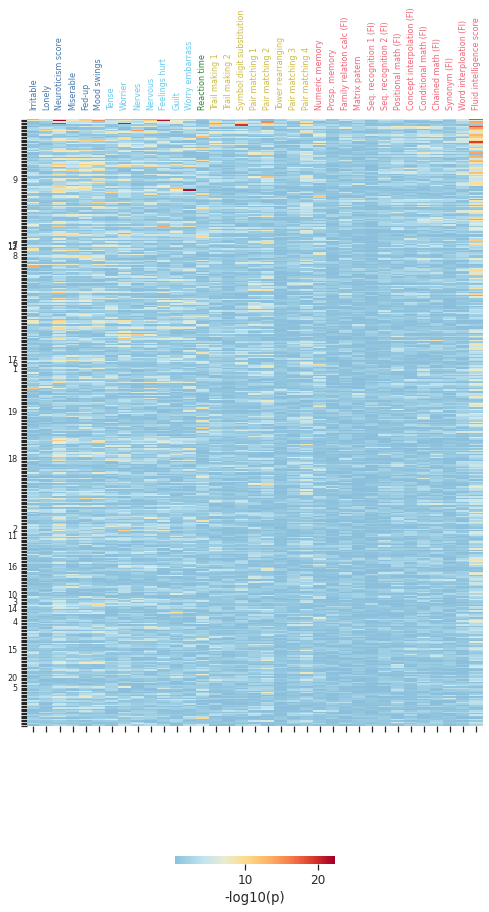

In [80]:
p_mat = -np.log10(ss.norm.sf(np.abs(z_mat)))

thresh = 4
i_thresh = p_mat > thresh
p_mat_thresh = np.zeros_like(p_mat)
p_mat_thresh[i_thresh] = 1

fig, ax = plt.subplots(1,1,figsize=(7,14))

YlOrBr_colors = ['#FFFFE5', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29', '#EC7014', '#CC4C02', '#993404', '#662506']
YlOrBr_cmap = LinearSegmentedColormap.from_list("ylorbr", YlOrBr_colors)
sunset_colors = ['#364B9A', '#4A7BB7', '#6EA6CD', '#98CAE1', '#C2E4EF', '#EAECCC', '#FEDA8B', '#FDB366', '#F67E4B', '#DD3D2D', '#A50026']
sunset_cmap = LinearSegmentedColormap.from_list("sunset", sunset_colors)

trait_labels = [id_var_dict[t] for t in trait_order] # id_var_dict defined below
#snp_labels = [s if s.startswith('rs') else f"chr{s.split('_')[0]}" for s in lead_df_plot.LEAD_SNP]
# snp_labels = [str(snp) if i%10==0 else " " for i,snp in enumerate(clustered_snp_order)]
snp_labels = [str(snp+1) if snp<20 else " " for i,snp in enumerate(clustered_snp_order)]
mask = None # -np.abs(z_mat) > nominal_threshold # 
sns.heatmap(p_mat, square=False, linewidths=0,
            center=-np.log10(5E-8), cmap=sunset_cmap, cbar_kws={"shrink": .35, 'label': "-log10(p)", "orientation": "horizontal"},
            ax=ax, mask=mask, xticklabels=trait_labels, yticklabels=snp_labels)
#cbar_ax = fig.get_axes()[1]

#ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, rotation=0)

cluster_1 = trait_order[:6] # worry
cluster_2 = trait_order[6:13] # depressed affect
cluster_3 = trait_order[13:14] # reaction time
cluster_4 = trait_order[14:22] # executive function
cluster_5 = trait_order[22:] # fluid intelligence

cluster_1_color = "#4477AA"
cluster_2_color = "#66CCEE"
cluster_3_color = "#228833"
cluster_4_color = "#CCBB44"
cluster_5_color = "#EE6677"

ax.tick_params(axis='x', rotation=90, labelsize=8, labeltop=True, labelbottom=False)
ax.tick_params(axis='y', labelsize=8)

for trait, tly, tlx in zip(trait_order, ax.get_yticklabels(),ax.get_xticklabels()):
    #clustered_trait_order.append(trait)
    if trait in cluster_1:
        tlx.set_color(cluster_1_color)
    elif trait in cluster_2:
        tlx.set_color(cluster_2_color)
    elif trait in cluster_3:
        tlx.set_color(cluster_3_color)
    elif trait in cluster_4:
        tlx.set_color(cluster_4_color)
    else:
        tlx.set_color(cluster_5_color)



plt.tight_layout()
plt.show()

In [79]:
model.labels_[clustered_snp_order[-8]]

0

In [44]:
ii = model.labels_ == 6

In [45]:
z_mat[ii]
#np.median(z_mat[ii],axis=0)

array([[-1.12902 , -4.01432 , -3.65764 , ...,  3.02164 ,  4.55003 ,
         8.86097 ],
       [ 0.7187  , -1.93166 , -4.68432 , ...,  1.3511  ,  3.05427 ,
         7.6425  ],
       [-7.80069 , -1.28988 , -9.13124 , ..., -1.65788 , -3.01309 ,
        -2.05904 ],
       ...,
       [-2.31517 ,  2.08719 , -2.90544 , ...,  0.38415 ,  1.28899 ,
         4.31562 ],
       [-1.16315 , -1.57941 , -1.78904 , ..., -0.885924, -0.428186,
         1.48813 ],
       [-0.292195, -2.08387 , -3.06252 , ...,  0.109653, -1.44174 ,
        -2.82037 ]])